In [ ]:
# Cell 1: imports and endpoints
import os
import json
import requests
from datetime import datetime, timezone
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Endpoints (SWPC GOES X-ray JSON)
GOES_1DAY_URL  = "https://services.swpc.noaa.gov/json/goes/primary/xrays-1-day.json"
GOES_30DAY_URL = "https://services.swpc.noaa.gov/json/goes/primary/xrays-30-day.json"

# Where to save raw files (optional - change if you want)
os.makedirs("/content/odindata", exist_ok=True)
RAW_JSON_PATH_1DAY = "/content/odindata/goes_xrays_1day.json"
RAW_JSON_PATH_30DAY = "/content/odindata/goes_xrays_30day.json"

print("Ready. Endpoints:")
print(GOES_1DAY_URL)
print(GOES_30DAY_URL)

Ready. Endpoints:
https://services.swpc.noaa.gov/json/goes/primary/xrays-1-day.json
https://services.swpc.noaa.gov/json/goes/primary/xrays-30-day.json


In [ ]:
# Cell 2: fetch the 1-day JSON and save it locally
def fetch_goes_json(url, save_path=None, timeout=30):
    print("Requesting:", url)
    r = requests.get(url, timeout=timeout)
    r.raise_for_status()   # raise error if request fails
    data = r.json()
    if save_path:
        with open(save_path, "w") as f:
            json.dump(data, f)
        print("Saved raw JSON to:", save_path)
    return data

# Fetch 1-day data
data_1day = fetch_goes_json(GOES_1DAY_URL, save_path=RAW_JSON_PATH_1DAY)

print("Items in JSON (sample count):", len(data_1day))
if len(data_1day) > 0:
    print("Sample keys from first record:", list(data_1day[0].keys()))

Requesting: https://services.swpc.noaa.gov/json/goes/primary/xrays-1-day.json
Saved raw JSON to: /content/odindata/goes_xrays_1day.json
Items in JSON (sample count): 2876
Sample keys from first record: ['time_tag', 'satellite', 'flux', 'observed_flux', 'electron_correction', 'electron_contaminaton', 'energy']


In [ ]:
# Cell 3: Parse JSON into DataFrame
import pandas as pd

def parse_goes_json(json_data):
    df = pd.DataFrame(json_data)
    # ensure time is in datetime format
    df["time_tag"] = pd.to_datetime(df["time_tag"])
    return df

df_1day = parse_goes_json(data_1day)

print("Shape of DataFrame:", df_1day.shape)
print("Columns:", df_1day.columns.tolist())
print("\nFirst 5 rows:")
print(df_1day.head())

Shape of DataFrame: (2876, 7)
Columns: ['time_tag', 'satellite', 'flux', 'observed_flux', 'electron_correction', 'electron_contaminaton', 'energy']

First 5 rows:
                   time_tag  satellite          flux  observed_flux  \
0 2025-09-08 12:53:00+00:00         18  2.917010e-09   1.058906e-08   
1 2025-09-08 12:53:00+00:00         18  7.130312e-07   7.237339e-07   
2 2025-09-08 12:54:00+00:00         18  3.846095e-09   1.140307e-08   
3 2025-09-08 12:54:00+00:00         18  7.277813e-07   7.384391e-07   
4 2025-09-08 12:55:00+00:00         18  6.097204e-09   1.372219e-08   

   electron_correction  electron_contaminaton      energy  
0         7.672047e-09                   True  0.05-0.4nm  
1         1.070270e-08                  False   0.1-0.8nm  
2         7.556978e-09                   True  0.05-0.4nm  
3         1.065783e-08                  False   0.1-0.8nm  
4         7.624984e-09                   True  0.05-0.4nm  


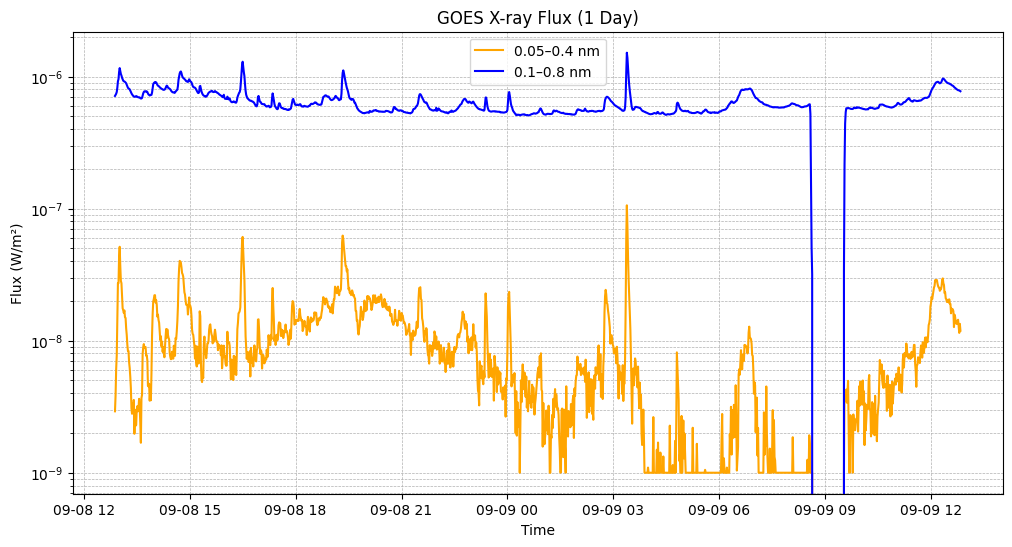

In [ ]:
# Reload JSON if needed
import json, pandas as pd, matplotlib.pyplot as plt

with open("/content/odindata/goes_xrays_1day.json", "r") as f:
    data_1day = json.load(f)

df_1day = pd.DataFrame(data_1day)
df_1day["time_tag"] = pd.to_datetime(df_1day["time_tag"])

# Plot function
def plot_flux(df):
    band1 = df[df["energy"] == "0.05-0.4nm"]
    band2 = df[df["energy"] == "0.1-0.8nm"]

    plt.figure(figsize=(12,6))
    plt.plot(band1["time_tag"], band1["flux"], label="0.05–0.4 nm", color="orange")
    plt.plot(band2["time_tag"], band2["flux"], label="0.1–0.8 nm", color="blue")
    plt.yscale("log")
    plt.xlabel("Time")
    plt.ylabel("Flux (W/m²)")
    plt.title("GOES X-ray Flux (1 Day)")
    plt.legend()
    plt.grid(True, which="both", ls="--", lw=0.5)
    plt.show()

# Now run the plot
plot_flux(df_1day)

In [ ]:
# Cell A: imports, endpoints, folders
import os, json, requests
from datetime import datetime, timezone
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

os.makedirs("/content/odindata", exist_ok=True)

# Endpoints (SWPC / GOES JSON products)
# Note: these are SWPC public JSON endpoints (near-real-time)
SWPC_RTSW_MAG_1M = "https://services.swpc.noaa.gov/json/rtsw/rtsw_mag_1m.json"
SWPC_RTSW_SWE_1M = "https://services.swpc.noaa.gov/json/rtsw/rtsw_swe_1m.json"   # solar wind plasma (speed, density, temp)
GOES_PROTONS_1DAY  = "https://services.swpc.noaa.gov/json/goes/primary/integral-protons-1-day.json"
GOES_PROTONS_30DAY = "https://services.swpc.noaa.gov/json/goes/primary/integral-protons-30-day.json"

RAW_MAG_PATH = "/content/odindata/swpc_rtsw_mag_1m.json"
RAW_SWE_PATH = "/content/odindata/swpc_rtsw_swe_1m.json"
RAW_GOES_P1D = "/content/odindata/goes_protons_1day.json"

print("Ready. Endpoints:")
print(SWPC_RTSW_MAG_1M)
print(SWPC_RTSW_SWE_1M)
print(GOES_PROTONS_1DAY)

Ready. Endpoints:
https://services.swpc.noaa.gov/json/rtsw/rtsw_mag_1m.json
https://services.swpc.noaa.gov/json/rtsw/rtsw_swe_1m.json
https://services.swpc.noaa.gov/json/goes/primary/integral-protons-1-day.json


In [ ]:
import requests, os, json

# Updated URLs
SWPC_RTSW_MAG_1M = "https://services.swpc.noaa.gov/products/solar-wind/mag-1-day.json"
SWPC_RTSW_SWE_1M = "https://services.swpc.noaa.gov/products/solar-wind/plasma-1-day.json"

# Save paths
RAW_MAG_PATH = "/content/odindata/swpc_rtsw_mag_1m.json"
RAW_SWE_PATH = "/content/odindata/swpc_rtsw_swe_1m.json"

# Generic fetcher
def fetch_and_save(url, save_path):
    print(f"Requesting {url}")
    r = requests.get(url)
    r.raise_for_status()
    data = r.json()
    with open(save_path, "w") as f:
        json.dump(data, f)
    print(f"Saved: {save_path}   (items) {len(data)}")
    return data

# Try fetching both
mag_json = fetch_and_save(SWPC_RTSW_MAG_1M, RAW_MAG_PATH)
swe_json = fetch_and_save(SWPC_RTSW_SWE_1M, RAW_SWE_PATH)

Requesting https://services.swpc.noaa.gov/products/solar-wind/mag-1-day.json
Saved: /content/odindata/swpc_rtsw_mag_1m.json   (items) 1282
Requesting https://services.swpc.noaa.gov/products/solar-wind/plasma-1-day.json
Saved: /content/odindata/swpc_rtsw_swe_1m.json   (items) 1396


In [ ]:
def inspect_sample(data, name, n=3):
    print(f"---- {name} ----")
    if isinstance(data, dict):
        print("Top-level keys:", list(data.keys()))
        sample = data if not isinstance(data, list) else data[0]
        if isinstance(sample, dict):
            print("Sample keys:", list(sample.keys()))
    elif isinstance(data, list):
        print(f"List with {len(data)} entries")
        if len(data) > 0:
            # Handle feeds with header row + data
            if isinstance(data[0], list):
                print("Header row:", data[0])
                print("First record:", data[1])
            else:
                print("First record keys:", list(data[0].keys()))
    print()

In [ ]:
inspect_sample(mag_json, "RTSW MAG (magnetometer 1-min)")
inspect_sample(swe_json, "RTSW SWE (plasma 1-min)")

---- RTSW MAG (magnetometer 1-min) ----
List with 1282 entries
Header row: ['time_tag', 'bx_gsm', 'by_gsm', 'bz_gsm', 'lon_gsm', 'lat_gsm', 'bt']
First record: ['2025-09-08 12:53:00.000', '-5.90', '1.49', '1.09', '165.87', '10.19', '6.19']

---- RTSW SWE (plasma 1-min) ----
List with 1396 entries
Header row: ['time_tag', 'density', 'speed', 'temperature']
First record: ['2025-09-08 12:53:00.000', '1.53', '488.7', '63072']



In [ ]:
import pandas as pd

def json_list_to_df(data):
    """
    Parse NOAA-style JSON where data[0] is the header row.
    """
    # First row = headers
    headers = data[0]
    # Remaining rows = values
    records = data[1:]
    df = pd.DataFrame(records, columns=headers)

    # Try to parse datetime
    if "time_tag" in df.columns:
        df["time_tag"] = pd.to_datetime(df["time_tag"], errors="coerce")

    # Convert all other cols to numeric
    for col in df.columns:
        if col != "time_tag":
            df[col] = pd.to_numeric(df[col], errors="coerce")

    return df

# Build DataFrames
df_mag = json_list_to_df(mag_json)
df_swe = json_list_to_df(swe_json)

print("MAG shape:", df_mag.shape, " | SWE shape:", df_swe.shape)
print("MAG cols:", df_mag.columns.tolist())
print("SWE cols:", df_swe.columns.tolist())
print(df_mag.head(3))

MAG shape: (1281, 7)  | SWE shape: (1395, 4)
MAG cols: ['time_tag', 'bx_gsm', 'by_gsm', 'bz_gsm', 'lon_gsm', 'lat_gsm', 'bt']
SWE cols: ['time_tag', 'density', 'speed', 'temperature']
             time_tag  bx_gsm  by_gsm  bz_gsm  lon_gsm  lat_gsm    bt
0 2025-09-08 12:53:00   -5.90    1.49    1.09   165.87    10.19  6.19
1 2025-09-08 12:54:00   -5.97    1.09    1.39   169.62    12.90  6.23
2 2025-09-08 12:55:00   -5.98    1.07    1.24   169.86    11.56  6.20


In [ ]:
# Cell E: normalize names and extract the standard fields we care about

# For MAG: keep bt (total B), bx, by, bz
possible_mag = ['bt','bx_gsm','bx','by','bz','b_gsm_x','b_gsm_y','b_gsm_z']
mag_keep = [c for c in df_mag.columns if any(p in c.lower() for p in possible_mag)]

# For SWE (plasma): speed, density, temperature
possible_swe = ['speed','v','density','proton_density','temperature','temp']
swe_keep = [c for c in df_swe.columns if any(p in c.lower() for p in possible_swe)]

# For PROT (safe handling if missing)
try:
    prot_keep = [c for c in df_prot.columns if any(s in c.lower() for s in ('flux','energy','channel','sat','time'))]
except NameError:
    df_prot = pd.DataFrame(columns=['time_tag'])
    prot_keep = []

print("MAG selected columns:", mag_keep)
print("SWE selected columns:", swe_keep)
print("PROT selected columns:", prot_keep)

# Build minimal reduced DataFrames
df_mag_red = df_mag[['time_tag'] + mag_keep].copy() if mag_keep else df_mag[['time_tag']].copy()
df_swe_red = df_swe[['time_tag'] + swe_keep].copy() if swe_keep else df_swe[['time_tag']].copy()
df_prot_red = df_prot[['time_tag'] + prot_keep].copy() if prot_keep else df_prot[['time_tag']].copy()

# Convert numeric columns to floats
for df in (df_mag_red, df_swe_red, df_prot_red):
    for c in df.columns:
        if c == 'time_tag':
            continue
        df[c] = pd.to_numeric(df[c], errors='coerce')

print("\nReduced shapes:", df_mag_red.shape, df_swe_red.shape, df_prot_red.shape)
print("MAG reduced head:\n", df_mag_red.head().to_string(index=False))
print("SWE reduced head:\n", df_swe_red.head().to_string(index=False))
print("PROT reduced head:\n", df_prot_red.head().to_string(index=False))

MAG selected columns: ['bx_gsm', 'by_gsm', 'bz_gsm', 'bt']
SWE selected columns: ['density', 'speed', 'temperature']
PROT selected columns: []

Reduced shapes: (1281, 5) (1395, 4) (0, 1)
MAG reduced head:
            time_tag  bx_gsm  by_gsm  bz_gsm   bt
2025-09-08 12:53:00   -5.90    1.49    1.09 6.19
2025-09-08 12:54:00   -5.97    1.09    1.39 6.23
2025-09-08 12:55:00   -5.98    1.07    1.24 6.20
2025-09-08 12:56:00   -5.75    1.94    0.74 6.11
2025-09-08 12:57:00   -5.75    1.96    0.92 6.15
SWE reduced head:
            time_tag  density  speed  temperature
2025-09-08 12:53:00     1.53  488.7      63072.0
2025-09-08 12:54:00     1.52  489.1      63600.0
2025-09-08 12:55:00     1.55  488.6      62104.0
2025-09-08 12:56:00     1.48  487.4      49551.0
2025-09-08 12:57:00     1.45  487.4      55445.0
PROT reduced head:
 Empty DataFrame
Columns: [time_tag]
Index: []


In [ ]:
# === New Cell: Proton Flux + Merge All ===
import os

# Define storage base directory
BASE_DIR = "/content/odindata"
os.makedirs(BASE_DIR, exist_ok=True)

# Proton flux endpoint (GOES-16, 1-day)
# Updated URL
GOES_PROTONS_1DAY = "https://services.swpc.noaa.gov/json/goes/primary/integral-protons-1-day.json"
RAW_PROT_PATH = os.path.join(BASE_DIR, "goes_protons_1day.json")

# Reuse your earlier helper functions (must already be defined in previous cells):
#   - fetch_and_save(url, path)
#   - json_list_to_df(data)  <-- Corrected function name

# Fetch and load JSON
proton_json = fetch_and_save(GOES_PROTONS_1DAY, RAW_PROT_PATH)
df_prot = json_list_to_df(proton_json) # <-- Corrected function name

print("PROT shape:", df_prot.shape)
print("PROT cols:", df_prot.columns.tolist())
print("PROT head:\n", df_prot.head().to_string(index=False))

# --- Reduce Proton Data ---
prot_keep = [c for c in df_prot.columns if any(s in c.lower() for s in ('flux','energy','channel','sat','time')) and c != 'time_tag']
df_prot_red = df_prot[['time_tag'] + prot_keep].copy() if prot_keep else df_prot[['time_tag']].copy()

# Convert numeric and handle datetime
for c in df_prot_red.columns:
    if c == 'time_tag':
        # Convert to timezone-naive datetime
        df_prot_red[c] = pd.to_datetime(df_prot_red[c]).dt.tz_convert(None)
    else:
        df_prot_red[c] = pd.to_numeric(df_prot_red[c], errors='coerce')


print("\nReduced PROT head:\n", df_prot_red.head().to_string(index=False))

# --- Merge MAG + SWE + PROT ---
df_all = pd.merge(df_mag_red, df_swe_red, on='time_tag', how='outer')
df_all = pd.merge(df_all, df_prot_red, on='time_tag', how='outer')
df_all = df_all.sort_values('time_tag').reset_index(drop=True)

print("\nMerged shape:", df_all.shape)
print("Merged columns:", df_all.columns.tolist())
print(df_all.head(10).to_string(index=False))

Requesting https://services.swpc.noaa.gov/json/goes/primary/integral-protons-1-day.json
Saved: /content/odindata/goes_protons_1day.json   (items) 2296
PROT shape: (2295, 4)
PROT cols: ['time_tag', 'satellite', 'flux', 'energy']
PROT head:
                  time_tag  satellite     flux  energy
2025-09-08 12:55:00+00:00         18 0.149261     NaN
2025-09-08 12:55:00+00:00         18 0.133638     NaN
2025-09-08 12:55:00+00:00         18 0.136520     NaN
2025-09-08 12:55:00+00:00         18 0.172994     NaN
2025-09-08 12:55:00+00:00         18 0.135240     NaN

Reduced PROT head:
            time_tag  satellite     flux  energy
2025-09-08 12:55:00         18 0.149261     NaN
2025-09-08 12:55:00         18 0.133638     NaN
2025-09-08 12:55:00         18 0.136520     NaN
2025-09-08 12:55:00         18 0.172994     NaN
2025-09-08 12:55:00         18 0.135240     NaN

Merged shape: (3440, 11)
Merged columns: ['time_tag', 'bx_gsm', 'by_gsm', 'bz_gsm', 'bt', 'density', 'speed', 'temperature', '

In [ ]:
# === New Cell: Data Cleaning + Resampling ===

# 1. Ensure time_tag is datetime index
df_all['time_tag'] = pd.to_datetime(df_all['time_tag'], errors='coerce')
df_all = df_all.set_index('time_tag').sort_index()

print("Time range:", df_all.index.min(), "->", df_all.index.max())
print("Original row count:", len(df_all))

# 2. Resample to uniform cadence (1 minute)
df_resampled = df_all.resample('1T').mean()

print("After resampling (1-min):", df_resampled.shape)

# 3. Interpolate missing values linearly
df_clean = df_resampled.interpolate(method='linear')

# 4. Drop columns that are completely empty
df_clean = df_clean.dropna(axis=1, how='all')

print("After cleaning:", df_clean.shape)
print("Remaining columns:", df_clean.columns.tolist())

# 5. Show a sample
print(df_clean.head(10).to_string())

Time range: 2025-09-08 12:53:00 -> 2025-09-09 12:51:00
Original row count: 3440
After resampling (1-min): (1439, 10)
After cleaning: (1439, 9)
Remaining columns: ['bx_gsm', 'by_gsm', 'bz_gsm', 'bt', 'density', 'speed', 'temperature', 'satellite', 'flux']
                     bx_gsm  by_gsm  bz_gsm    bt  density  speed  temperature  satellite      flux
time_tag                                                                                           
2025-09-08 12:53:00   -5.90    1.49    1.09  6.19     1.53  488.7      63072.0        NaN       NaN
2025-09-08 12:54:00   -5.97    1.09    1.39  6.23     1.52  489.1      63600.0        NaN       NaN
2025-09-08 12:55:00   -5.98    1.07    1.24  6.20     1.55  488.6      62104.0       18.0  0.141303
2025-09-08 12:56:00   -5.75    1.94    0.74  6.11     1.48  487.4      49551.0       18.0  0.164916
2025-09-08 12:57:00   -5.75    1.96    0.92  6.15     1.45  487.4      55445.0       18.0  0.188529
2025-09-08 12:58:00   -5.74    2.26    0.04  

/tmp/ipython-input-2813846363.py:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df_all.resample('1T').mean()


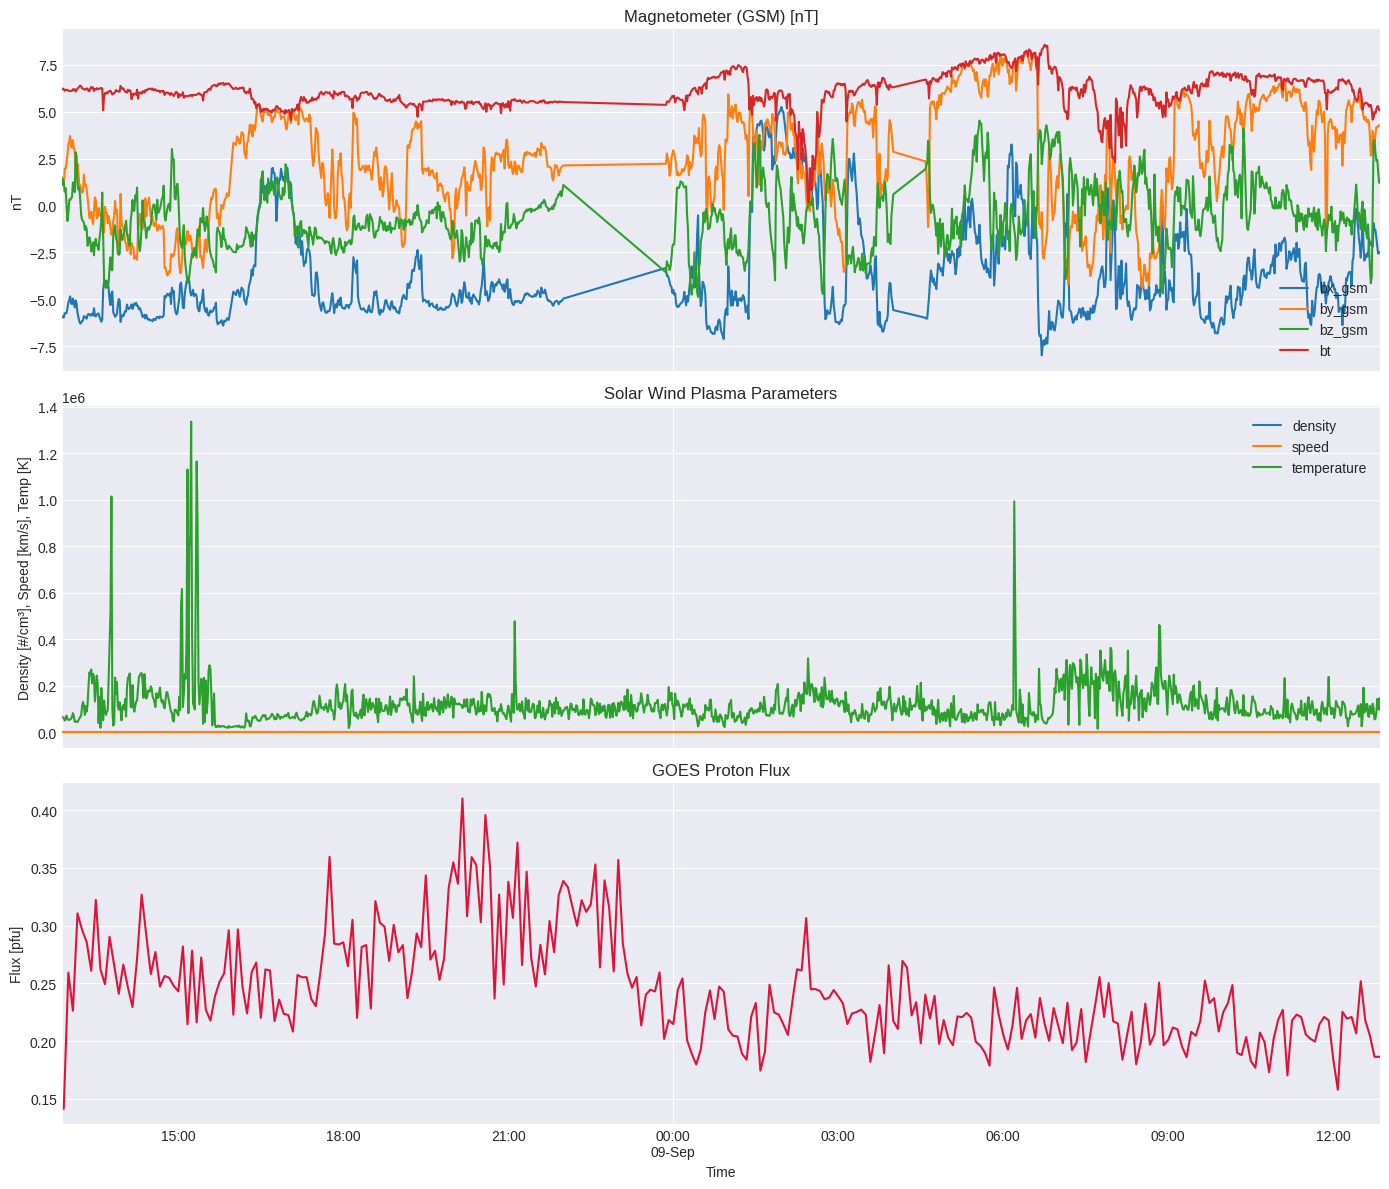

In [ ]:
# --- Exploratory Data Analysis (EDA) ---
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-darkgrid")
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# 1. Magnetometer
df_clean[['bx_gsm', 'by_gsm', 'bz_gsm', 'bt']].plot(ax=axes[0])
axes[0].set_title("Magnetometer (GSM) [nT]")
axes[0].set_ylabel("nT")

# 2. Solar Wind Plasma
df_clean[['density', 'speed', 'temperature']].plot(ax=axes[1])
axes[1].set_title("Solar Wind Plasma Parameters")
axes[1].set_ylabel("Density [#/cm³], Speed [km/s], Temp [K]")

# 3. Proton Flux
df_clean['flux'].plot(ax=axes[2], color="crimson")
axes[2].set_title("GOES Proton Flux")
axes[2].set_ylabel("Flux [pfu]")
axes[2].set_xlabel("Time")

plt.tight_layout()
plt.show()

In [ ]:
# --- Feature Engineering + Normalization ---
from sklearn.preprocessing import StandardScaler

# Drop non-numeric (time index is already set)
features = df_clean.dropna(subset=['flux']).copy()

# Select input variables for ODIN
X = features[['bx_gsm','by_gsm','bz_gsm','bt',
              'density','speed','temperature','flux']]

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Back into DataFrame
df_features = pd.DataFrame(X_scaled,
                           columns=X.columns,
                           index=features.index)

print("Feature matrix shape:", df_features.shape)
print("Features:", list(df_features.columns))
df_features.head()

Feature matrix shape: (1437, 8)
Features: ['bx_gsm', 'by_gsm', 'bz_gsm', 'bt', 'density', 'speed', 'temperature', 'flux']


,bx_gsm,by_gsm,bz_gsm,bt,density,speed,temperature,flux
time_tag,,,,,,,,
2025-09-08 12:55:00,-0.882450,-0.499728,1.133285,0.205621,-0.211254,-0.107258,-0.594103,-2.396323
2025-09-08 12:56:00,-0.789289,-0.175397,0.829031,0.109299,-0.273199,-0.141701,-0.727153,-1.846532
2025-09-08 12:57:00,-0.789289,-0.167941,0.938563,0.152109,-0.299747,-0.141701,-0.664682,-1.296742
2025-09-08 12:58:00,-0.785239,-0.056103,0.403076,0.173514,-0.113913,-0.110128,-0.500407,-0.746951
2025-09-08 12:59:00,-0.683978,0.089286,-0.126326,0.162811,-0.149310,-0.009668,-0.648858,-0.197161


In [ ]:
import numpy as np

def create_sequences(data, target_col, window=60, horizon=30):
    """
    Build lagged sequences for time series forecasting.

    Args:
        data: pd.DataFrame (normalized features)
        target_col: str, which column to forecast (e.g., 'flux')
        window: int, number of past timesteps in each sequence
        horizon: int, how many steps ahead to forecast

    Returns:
        X (n_samples, window, n_features)
        y (n_samples,)
    """
    X, y = [], []
    values = data.values
    target_idx = data.columns.get_loc(target_col)

    for i in range(len(values) - window - horizon):
        X.append(values[i : i + window])
        y.append(values[i + window + horizon, target_idx])

    return np.array(X), np.array(y)

# Example: use 60-minute history, forecast 30 minutes ahead
X_seq, y_seq = create_sequences(df_features, target_col='flux', window=60, horizon=30)

print("Sequence shape:", X_seq.shape)  # (samples, timesteps, features)
print("Target shape:", y_seq.shape)

Sequence shape: (1347, 60, 8)
Target shape: (1347,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.2, shuffle=False
)

print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)

Train: (1077, 60, 8) (1077,)
Test : (270, 60, 8) (270,)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_hybrid_model(input_shape):
    inputs = layers.Input(shape=input_shape)

    # LSTM branch
    x = layers.LSTM(64, return_sequences=True)(inputs)
    x = layers.LSTM(32, return_sequences=True)(x)

    # Transformer Encoder block
    attn_output = layers.MultiHeadAttention(num_heads=4, key_dim=32)(x, x)
    attn_output = layers.Dropout(0.2)(attn_output)
    x = layers.LayerNormalization(epsilon=1e-6)(x + attn_output)

    ffn = layers.Dense(128, activation="relu")(x)
    ffn = layers.Dense(32)(ffn)
    x = layers.LayerNormalization(epsilon=1e-6)(x + ffn)

    # Global pooling
    x = layers.GlobalAveragePooling1D()(x)

    # Dense regression head
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(1)(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
                  loss="mse",
                  metrics=["mae"])
    return model

# Build the model
model = build_hybrid_model((60, 8))
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 60, 8)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 60, 64)    │     18,688 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 60, 32)    │     12,416 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 60, 32)    │     16,800 │ lstm_1[0][0],     │
│ (MultiHeadAttentio… │                   │            │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 60, 32)    │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 60, 32)    │          0 │ lstm_1[0][0],     │
│                     │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 60, 32)    │         64 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 60, 128)   │      4,224 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 60, 32)    │      4,128 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 60, 32)    │          0 │ layer_normalizat… │
│                     │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 60, 32)    │         64 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 32)        │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      2,112 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │         65 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 58,561 (228.75 KB)

 Trainable params: 58,561 (228.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Callbacks
callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=1e-6),
    ModelCheckpoint("odin_hybrid_best.keras", save_best_only=True, monitor="val_loss")
]

# Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - loss: 0.6397 - mae: 0.6264 - val_loss: 0.2416 - val_mae: 0.3667 - learning_rate: 0.0010
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - loss: 0.3210 - mae: 0.4470 - val_loss: 0.2092 - val_mae: 0.3626 - learning_rate: 0.0010
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.3556 - mae: 0.4626 - val_loss: 0.2530 - val_mae: 0.3940 - learning_rate: 0.0010
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 0.2857 - mae: 0.4124 - val_loss: 0.2469 - val_mae: 0.3832 - learning_rate: 0.0010
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - loss: 0.2855 - mae: 0.4116 - val_loss: 0.2021 - val_mae: 0.3598 - learning_rate: 0.0010
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 0.2459 - mae: 0.3804 - val_loss: 0.2250 - val_mae: 0.3741 - learning_rate: 0.0010
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.3120 - mae: 0.4277 - val_loss: 0.2310 - val_mae: 0.3662 - learning_rate: 0.0010
Epoch 8/5

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Test RMSE: 0.4400
Test R²: -0.1016


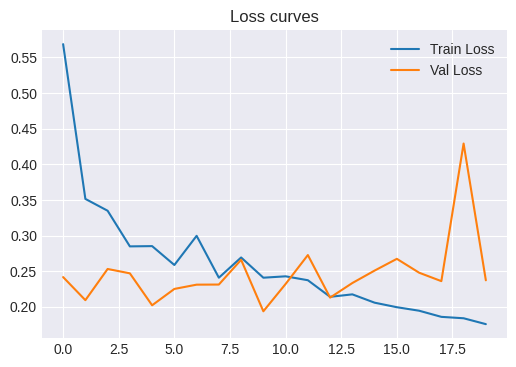

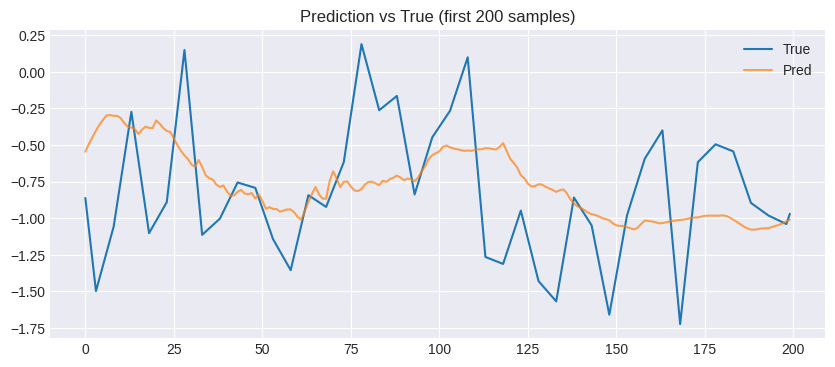

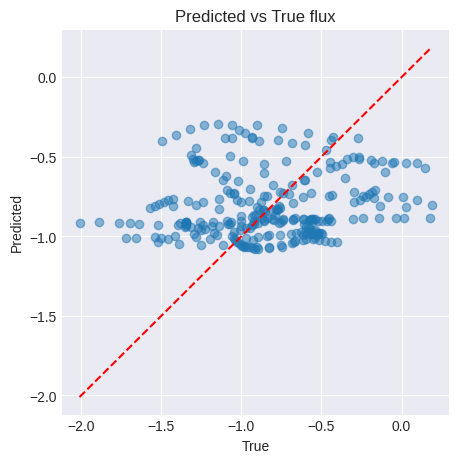

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluate
y_pred = model.predict(X_test).flatten()
y_true = y_test

# Denormalize if you scaled flux earlier (optional)
# y_pred = scaler.inverse_transform(y_pred.reshape(-1,1)).flatten()
# y_true = scaler.inverse_transform(y_true.reshape(-1,1)).flatten()

# Metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²: {r2:.4f}")

# 1. Loss curves
plt.figure(figsize=(6,4))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss curves")
plt.show()

# 2. Prediction vs True
plt.figure(figsize=(10,4))
plt.plot(y_true[:200], label="True")
plt.plot(y_pred[:200], label="Pred", alpha=0.7)
plt.legend()
plt.title("Prediction vs True (first 200 samples)")
plt.show()

# 3. Scatter plot
plt.figure(figsize=(5,5))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()], 'r--')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("Predicted vs True flux")
plt.show()

In [ ]:
import requests

url = "https://services.swpc.noaa.gov/json/goes/primary/xrays-7-day.json"  # example API
data = requests.get(url).json()

print(data[0])   # peek at the first entry

{'time_tag': '2025-09-02T13:22:00Z', 'satellite': 18, 'flux': 9.387902899504752e-09, 'observed_flux': 9.532485911734057e-09, 'electron_correction': 1.4458353958524128e-10, 'electron_contaminaton': False, 'energy': '0.05-0.4nm'}


In [ ]:
df = pd.DataFrame(data)

df.rename(columns={
    "flux": "proton_flux"
}, inplace=True)

In [ ]:
def standardize_data(goes_data=None, dscovr_data=None):
    dfs = []

    if goes_data is not None:
        df_goes = pd.DataFrame(goes_data)
        df_goes.rename(columns={"flux": "proton_flux"}, inplace=True)
        dfs.append(df_goes[["time_tag", "proton_flux"]])

    if dscovr_data is not None:
        df_dscovr = pd.DataFrame(dscovr_data)
        df_dscovr.rename(columns={
            "bz_gsm": "bz",
            "density": "plasma_density"
        }, inplace=True)
        dfs.append(df_dscovr[["time_tag", "bz", "plasma_density"]])

    # merge all on time
    if dfs:
        df_final = dfs[0]
        for d in dfs[1:]:
            df_final = pd.merge(df_final, d, on="time_tag", how="outer")
        return df_final

    return pd.DataFrame()

/tmp/ipython-input-1032645511.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_norm[cols] = scaler.fit_transform(df[cols].fillna(method="ffill").fillna(0))


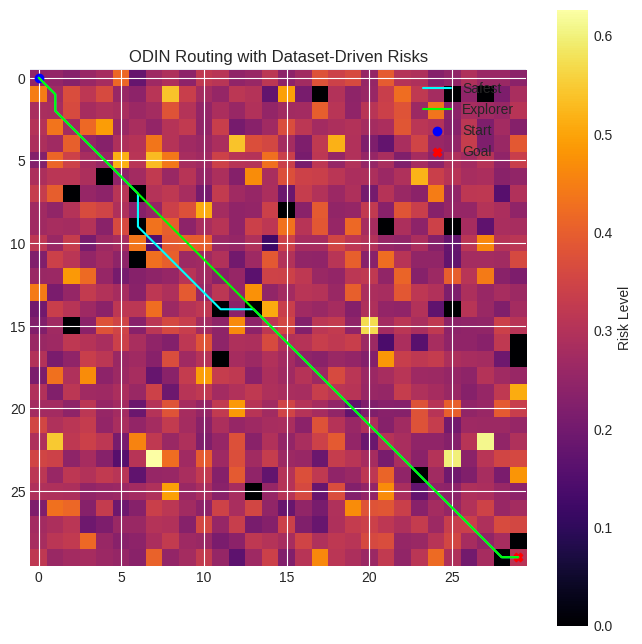

In [ ]:
# === New Cell: ODIN Dataset-driven Obstacle Risk Fusion & Routing ===

import requests, pandas as pd, numpy as np, os, heapq
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 1. Fetch APIs
goes_url = "https://services.swpc.noaa.gov/json/goes/primary/integral-protons-1-day.json"
rtsw_wind_url = "https://services.swpc.noaa.gov/json/rtsw/rtsw_wind_1m.json"
rtsw_mag_url  = "https://services.swpc.noaa.gov/json/rtsw/rtsw_mag_1m.json"

goes_data = requests.get(goes_url).json()
wind_data = requests.get(rtsw_wind_url).json()
mag_data  = requests.get(rtsw_mag_url).json()

# 2. Build DataFrames
df_goes = pd.DataFrame(goes_data)
df_wind = pd.DataFrame(wind_data)
df_mag  = pd.DataFrame(mag_data)

# Rename and keep only needed columns
df_goes.rename(columns={"flux": "proton_flux"}, inplace=True)
df_wind.rename(columns={"proton_density":"plasma_density"}, inplace=True)
df_mag.rename(columns={"bz_gsm": "bz"}, inplace=True)

df_goes = df_goes[["time_tag", "proton_flux"]]
df_wind = df_wind[["time_tag", "plasma_density"]]
df_mag  = df_mag[["time_tag", "bz"]]

# Merge
df = df_goes.merge(df_wind, on="time_tag", how="outer").merge(df_mag, on="time_tag", how="outer")
#df["time_tag"] = pd.to_datetime(df["time_tag"], utc=True)
df["time_tag"] = pd.to_datetime(df["time_tag"], errors='coerce')

# 3. Normalize
scaler = MinMaxScaler()
cols = ["proton_flux", "bz", "plasma_density"]
df_norm = df.copy()
df_norm[cols] = scaler.fit_transform(df[cols].fillna(method="ffill").fillna(0))
# For Bz risk, negative is risky → invert
df_norm["bz_risk"] = 1.0 - df_norm["bz"]
df_norm["risk_score"] = (0.4*df_norm["proton_flux"] +
                         0.3*df_norm["bz_risk"] +
                         0.3*df_norm["plasma_density"])

# 4. Make grid of risk hotspots
GRID_SIZE = 30
risk_map = np.zeros((GRID_SIZE, GRID_SIZE))
for score in df_norm["risk_score"].dropna().values:
    i, j = np.random.randint(0, GRID_SIZE, 2)
    risk_map[i, j] = max(risk_map[i, j], score)

# 5. A* definitions
start, goal = (0, 0), (GRID_SIZE-1, GRID_SIZE-1)
def astar(start, goal, risk_map, mode="safest"):
    rows, cols = risk_map.shape
    open_list = [(0, start)]
    came_from = {}
    g_score = {start: 0}
    while open_list:
        _, cur = heapq.heappop(open_list)
        if cur == goal:
            path = []
            while cur in came_from:
                path.append(cur); cur = came_from[cur]
            return [start] + path[::-1]
        for dx, dy in [(-1,0),(1,0),(0,-1),(0,1),(-1,-1),(1,-1),(1,1),(-1,-1)]:
            ni, nj = cur[0]+dx, cur[1]+dy
            if 0 <= ni < rows and 0 <= nj < cols:
                dist = np.hypot(dx, dy)
                r = risk_map[ni, nj]
                cost = dist + (10*r if mode=="safest" else 2*r)
                tg = g_score[cur] + cost
                if (ni, nj) not in g_score or tg < g_score[(ni,nj)]:
                    g_score[(ni,nj)] = tg
                    priority = tg + np.hypot(goal[0]-ni, goal[1]-nj)
                    heapq.heappush(open_list, (priority, (ni, nj)))
                    came_from[(ni, nj)] = cur
    return None

path_safest = astar(start, goal, risk_map, "safest")
path_explorer = astar(start, goal, risk_map, "explorer")

# 6. Visualization
plt.figure(figsize=(8,8))
plt.imshow(risk_map, cmap="inferno")
plt.colorbar(label="Risk Level")
if path_safest:
    xs, ys = zip(*path_safest); plt.plot(ys, xs, 'cyan', label="Safest")
if path_explorer:
    xs, ys = zip(*path_explorer); plt.plot(ys, xs, 'lime', label="Explorer")
plt.scatter(start[1], start[0], c="blue", marker="o", label="Start")
plt.scatter(goal[1], goal[0], c="red", marker="X", label="Goal")
plt.legend(); plt.title("ODIN Routing with Dataset-Driven Risks")
plt.show()

In [ ]:
import requests
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# === Part A: Fetch All Required APIs ===
print("Fetching space weather data...")
goes_url = "https://services.swpc.noaa.gov/json/goes/primary/integral-protons-1-day.json"
rtsw_mag_url = "https://services.swpc.noaa.gov/products/solar-wind/mag-1-day.json"
rtsw_swe_url = "https://services.swpc.noaa.gov/products/solar-wind/plasma-1-day.json"

goes_json = requests.get(goes_url).json()
mag_json = requests.get(rtsw_mag_url).json()
swe_json = requests.get(rtsw_swe_url).json()
print("Data fetched successfully.")

# === Part B: Parse and Merge DataFrames ===
# Helper function to parse JSON lists with headers
def json_list_to_df(data):
    if not data or len(data) < 2: return pd.DataFrame()
    df = pd.DataFrame(data[1:], columns=data[0])
    df["time_tag"] = pd.to_datetime(df["time_tag"], errors="coerce")
    for col in df.columns:
        if col != "time_tag":
            df[col] = pd.to_numeric(df[col], errors="coerce")
    return df

# Create and reduce individual dataframes
df_goes = json_list_to_df(goes_json).rename(columns={"flux": "proton_flux"})
# FIX: Convert GOES time_tag to timezone-naive to allow merging
df_goes['time_tag'] = df_goes['time_tag'].dt.tz_localize(None)
df_goes = df_goes[["time_tag", "proton_flux"]]

df_mag = json_list_to_df(mag_json)[["time_tag", "bz_gsm"]]
df_swe = json_list_to_df(swe_json).rename(columns={"density": "plasma_density"})[["time_tag", "plasma_density"]]


# Merge into a single DataFrame
df_merged = pd.merge(df_goes, df_swe, on="time_tag", how="outer")
df_merged = pd.merge(df_merged, df_mag, on="time_tag", how="outer")
print("DataFrames merged.")


# === Part C: Clean and Resample Data ===
df_merged = df_merged.set_index('time_tag').sort_index()
df_resampled = df_merged.resample('1T').mean()
df_clean = df_resampled.interpolate(method='linear')
print("Data cleaned and resampled to 1-minute cadence.")


# === Part D: Calculate Risk Score (Your Step 1) ===
# Drop rows where essential data is still missing
df_risk = df_clean.dropna(subset=['proton_flux', 'bz_gsm', 'plasma_density']).copy()

# 1. Select and normalize the features
scaler = MinMaxScaler()
risk_features = ["proton_flux", "bz_gsm", "plasma_density"]
df_risk[risk_features] = scaler.fit_transform(df_risk[risk_features])

# 2. Invert the normalized 'bz_gsm' to create 'bz_risk'
df_risk["bz_risk"] = 1.0 - df_risk["bz_gsm"]

# 3. Fuse features into a single weighted risk score
weights = {"proton_flux": 0.4, "bz_risk": 0.3, "plasma_density": 0.3}
df_risk["risk_score"] = (df_risk["proton_flux"] * weights["proton_flux"] +
                         df_risk["bz_risk"] * weights["bz_risk"] +
                         df_risk["plasma_density"] * weights["plasma_density"])

print("\nRisk score calculated successfully. Sample:")
print(df_risk[['risk_score', 'proton_flux', 'bz_risk', 'plasma_density']].head())

Fetching space weather data...
Data fetched successfully.
DataFrames merged.
Data cleaned and resampled to 1-minute cadence.

Risk score calculated successfully. Sample:
                     risk_score  proton_flux   bz_risk  plasma_density
time_tag                                                              
2025-09-08 13:40:00    0.283359     0.000000  0.940426        0.004103
2025-09-08 13:41:00    0.329707     0.107730  0.948936        0.006448
2025-09-08 13:42:00    0.364501     0.215459  0.921277        0.006448
2025-09-08 13:43:00    0.413018     0.323189  0.939362        0.006448
2025-09-08 13:44:00    0.448711     0.430918  0.914894        0.006252


/tmp/ipython-input-1797597630.py:46: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df_merged.resample('1T').mean()


In [ ]:
# === New Cell: Create Risk Map ===
import numpy as np

# Create a 30x30 grid for our space environment
GRID_SIZE = 30
risk_map = np.zeros((GRID_SIZE, GRID_SIZE))

# Randomly place risk scores from your DataFrame onto the grid as "obstacles"
for score in df_risk["risk_score"].values:
    i, j = np.random.randint(0, GRID_SIZE, 2)
    # If a cell is chosen twice, we keep the higher risk score
    risk_map[i, j] = max(risk_map[i, j], score)

# Define start and goal coordinates for the pathfinder
start = (0, 0)
goal = (GRID_SIZE - 1, GRID_SIZE - 1)

print(f"Created a {GRID_SIZE}x{GRID_SIZE} risk map from the dataset.")
print(f"Highest risk hotspot on the map: {risk_map.max():.4f}")

Created a 30x30 risk map from the dataset.
Highest risk hotspot on the map: 0.7762


In [ ]:
# === New Cell: A* Pathfinding Algorithm ===
import heapq

def astar(start_node, goal_node, risk_grid, mode="safest"):
    """
    Finds the optimal path on a grid using the A* algorithm.
    The 'mode' parameter adjusts how much penalty is applied to risky cells.
    """
    rows, cols = risk_grid.shape
    open_list = [(0, start_node)]  # (priority, (x, y))
    came_from = {}
    g_score = {start_node: 0}

    # Set the risk penalty based on the selected mode
    # Safest mode heavily penalizes risk; Explorer mode does so less.
    risk_weight = 10 if mode == "safest" else 2

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal_node:
            # Reconstruct the path from goal to start
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            return [start_node] + path[::-1]

        # Explore neighbors (including diagonals)
        for dx, dy in [(-1,0), (1,0), (0,-1), (0,1), (-1,-1), (1,-1), (1,1), (-1,1)]:
            neighbor = (current[0] + dx, current[1] + dy)

            # Ensure the neighbor is within the grid
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                # Calculate the cost to move to the neighbor
                distance = np.hypot(dx, dy) # Euclidean distance for the move
                risk = risk_grid[neighbor[0], neighbor[1]]
                move_cost = distance + (risk_weight * risk)

                tentative_g = g_score[current] + move_cost
                if neighbor not in g_score or tentative_g < g_score[neighbor]:
                    g_score[neighbor] = tentative_g
                    # Heuristic: Euclidean distance to the goal
                    h_score = np.hypot(goal_node[0] - neighbor[0], goal_node[1] - neighbor[1])
                    f_score = tentative_g + h_score # Total estimated cost
                    heapq.heappush(open_list, (f_score, neighbor))
                    came_from[neighbor] = current

    return None # No path found

print("A* pathfinding function defined.")

A* pathfinding function defined.


Calculating Safest route...
Calculating Explorer route...

Safest route found with 42 steps.
Explorer route found with 35 steps.


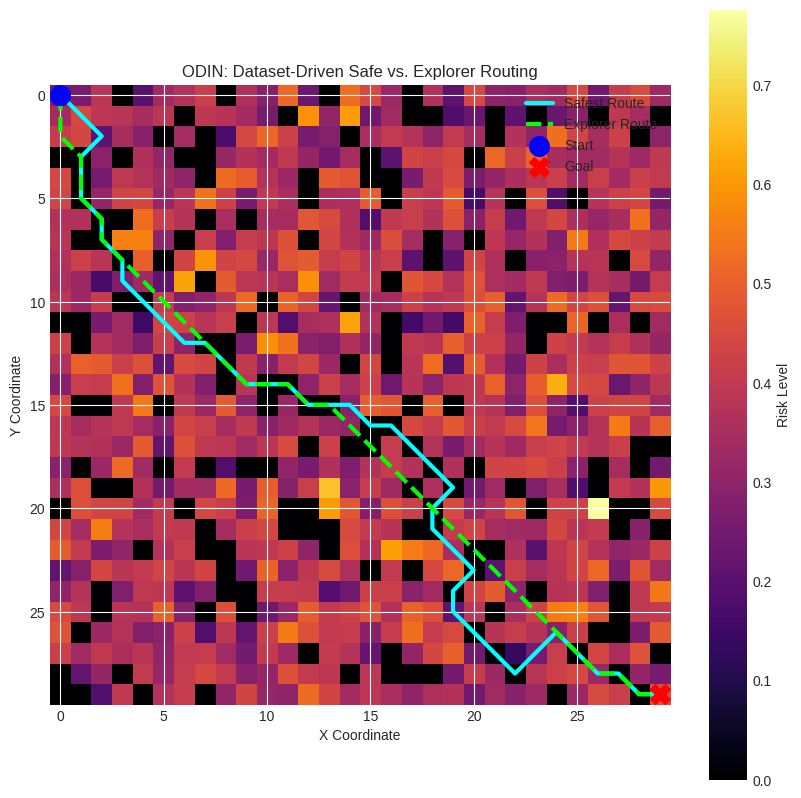

In [ ]:
# === New Cell: Run ODIN and Visualize ===
import matplotlib.pyplot as plt

# 1. Run ODIN for both modes
print("Calculating Safest route...")
path_safest = astar(start, goal, risk_map, mode="safest")
print("Calculating Explorer route...")
path_explorer = astar(start, goal, risk_map, mode="explorer")

# 2. Plot the results
plt.figure(figsize=(10, 10))
plt.imshow(risk_map, cmap="inferno", interpolation="nearest")
plt.colorbar(label="Risk Level")

# Plot paths if they were found
if path_safest:
    xs, ys = zip(*path_safest)
    plt.plot(ys, xs, 'cyan', linewidth=3, label="Safest Route")
    print(f"\nSafest route found with {len(path_safest)} steps.")
else:
    print("No safest route found.")

if path_explorer:
    xs, ys = zip(*path_explorer)
    plt.plot(ys, xs, 'lime', linestyle='--', linewidth=3, label="Explorer Route")
    print(f"Explorer route found with {len(path_explorer)} steps.")
else:
    print("No explorer route found.")


# Plot start and goal points
plt.scatter(start[1], start[0], marker="o", s=200, c="blue", label="Start", zorder=5)
plt.scatter(goal[1], goal[0], marker="X", s=200, c="red", label="Goal", zorder=5)

plt.legend()
plt.title("ODIN: Dataset-Driven Safe vs. Explorer Routing")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

Forecasting model loaded successfully.


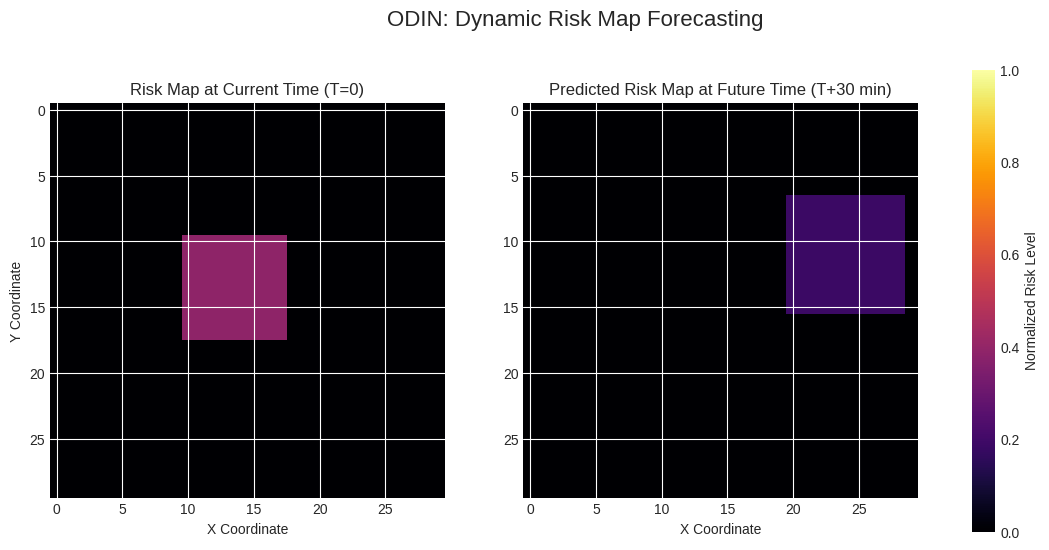

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

# === Part A: Load the Trained Forecasting Model ===
try:
    forecasting_model = load_model("odin_hybrid_best.keras")
    print("Forecasting model loaded successfully.")
except Exception as e:
    print(f"Could not load the model. Please ensure you have run the training cell. Error: {e}")
    forecasting_model = None

# === Part B: Create a Function to Generate a Future Risk Map ===
def create_future_risk_map(features_df, current_time_index, window=60, horizon=30):
    """
    Generates a risk map for a future time using the forecasting model.
    """
    if not forecasting_model:
        print("Model not available. Returning an empty map.")
        return np.zeros((GRID_SIZE, GRID_SIZE))

    # 1. Get the last 'window' of data to feed into the model
    # Note: The model expects 8 features as input, which df_features has.
    input_sequence = features_df.iloc[current_time_index - window : current_time_index].values
    input_sequence = np.expand_dims(input_sequence, axis=0)

    # 2. Predict the future value for the target column ('flux')
    predicted_normalized_flux = forecasting_model.predict(input_sequence, verbose=0)[0][0]

    # 3. Get current values for other risk factors from the same dataframe
    # FIX: Using 'bz_gsm' and 'density' to match the columns in df_features
    current_normalized_bz = features_df.iloc[current_time_index]['bz_gsm']
    current_normalized_density = features_df.iloc[current_time_index]['density']

    # 4. Calculate the future risk score using the *predicted* flux
    future_bz_risk = 1.0 - current_normalized_bz

    # FIX: Using the correct column names for the weights dictionary
    weights = {"flux": 0.4, "bz_risk": 0.3, "density": 0.3}
    future_risk_score = (weights["flux"] * predicted_normalized_flux +
                         weights["bz_risk"] * future_bz_risk +
                         weights["density"] * current_normalized_density)

    # 5. Generate and return the risk map for that future score
    future_risk_map = np.zeros((GRID_SIZE, GRID_SIZE))
    risk_level = np.clip(future_risk_score, 0, 1)
    center_x, center_y = np.random.randint(5, GRID_SIZE - 5, 2)
    radius = 4
    for i in range(-radius, radius + 1):
        for j in range(-radius, radius + 1):
            if 0 <= center_x + i < GRID_SIZE and 0 <= center_y + j < GRID_SIZE:
                future_risk_map[center_x + i, center_y + j] = risk_level

    return future_risk_map

# === Part C: Demonstrate the Dynamic Map ===
# Use the normalized feature dataframe 'df_features' the model was trained on
if forecasting_model:
    # Get the current risk score for a sample time point (e.g., index 100)
    # FIX: Renamed columns to match df_features and how the risk score was calculated
    temp_df = df_features.copy()
    temp_df["bz_risk"] = 1.0 - temp_df["bz_gsm"]
    temp_df["risk_score"] = (temp_df["flux"] * 0.4 +
                             temp_df["bz_risk"] * 0.3 +
                             temp_df["density"] * 0.3)

    current_risk_score = temp_df.iloc[100]['risk_score']
    current_risk_map = np.zeros((GRID_SIZE, GRID_SIZE))
    current_risk_map[10:18, 10:18] = current_risk_score # Example current hotspot

    # Create a predicted risk map for 30 minutes in the future
    future_map = create_future_risk_map(df_features, current_time_index=100)

    # Visualize the two maps side-by-side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    im1 = ax1.imshow(current_risk_map, cmap="inferno", vmin=0, vmax=1)
    ax1.set_title("Risk Map at Current Time (T=0)")
    ax1.set_xlabel("X Coordinate")
    ax1.set_ylabel("Y Coordinate")

    im2 = ax2.imshow(future_map, cmap="inferno", vmin=0, vmax=1)
    ax2.set_title("Predicted Risk Map at Future Time (T+30 min)")
    ax2.set_xlabel("X Coordinate")

    fig.colorbar(im1, ax=[ax1, ax2], label="Normalized Risk Level")
    plt.suptitle("ODIN: Dynamic Risk Map Forecasting", fontsize=16)
    plt.show()

In [ ]:
# === New Cell: Enhanced A* Pathfinding Algorithm ===
import heapq
import numpy as np

def astar_with_costs(start_node, goal_node, risk_grid, mode="safest"):
    """
    Finds the optimal path and calculates its total cost in terms of
    distance and accumulated risk.
    """
    rows, cols = risk_grid.shape
    open_list = [(0, start_node)]
    came_from = {}
    g_score = {start_node: 0}
    risk_weight = 10 if mode == "safest" else 2

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal_node:
            # Reconstruct path and calculate total costs
            path = []
            total_risk = 0
            total_distance = 0

            temp_node = current
            while temp_node in came_from:
                path.append(temp_node)
                prev_node = came_from[temp_node]

                # Add the risk of the cell you are entering
                total_risk += risk_grid[temp_node[0], temp_node[1]]
                # Add the distance from the previous cell
                dx, dy = temp_node[0] - prev_node[0], temp_node[1] - prev_node[1]
                total_distance += np.hypot(dx, dy)

                temp_node = prev_node

            path.append(start_node)
            path = path[::-1] # Reverse to get start -> goal order

            costs = {"risk": total_risk, "distance": total_distance}
            return path, costs

        # --- A* search logic (same as before) ---
        for dx, dy in [(-1,0), (1,0), (0,-1), (0,1), (-1,-1), (1,-1), (1,1), (-1,1)]:
            neighbor = (current[0] + dx, current[1] + dy)

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                distance = np.hypot(dx, dy)
                risk = risk_grid[neighbor[0], neighbor[1]]
                move_cost = distance + (risk_weight * risk)

                tentative_g = g_score.get(current, float('inf')) + move_cost
                if tentative_g < g_score.get(neighbor, float('inf')):
                    g_score[neighbor] = tentative_g
                    h_score = np.hypot(goal_node[0] - neighbor[0], goal_node[1] - neighbor[1])
                    f_score = tentative_g + h_score
                    heapq.heappush(open_list, (f_score, neighbor))
                    came_from[neighbor] = current

    return None, {} # No path found

print("Enhanced A* pathfinding function ('astar_with_costs') is now defined.")

Enhanced A* pathfinding function ('astar_with_costs') is now defined.


--- ODIN Mission Control ---
Planning initiated at time index: 100
Future risk map generated based on forecast.

--- ODIN DECISION LOG ---
Defaulting to Safest Route to minimize all potential risk.
-------------------------



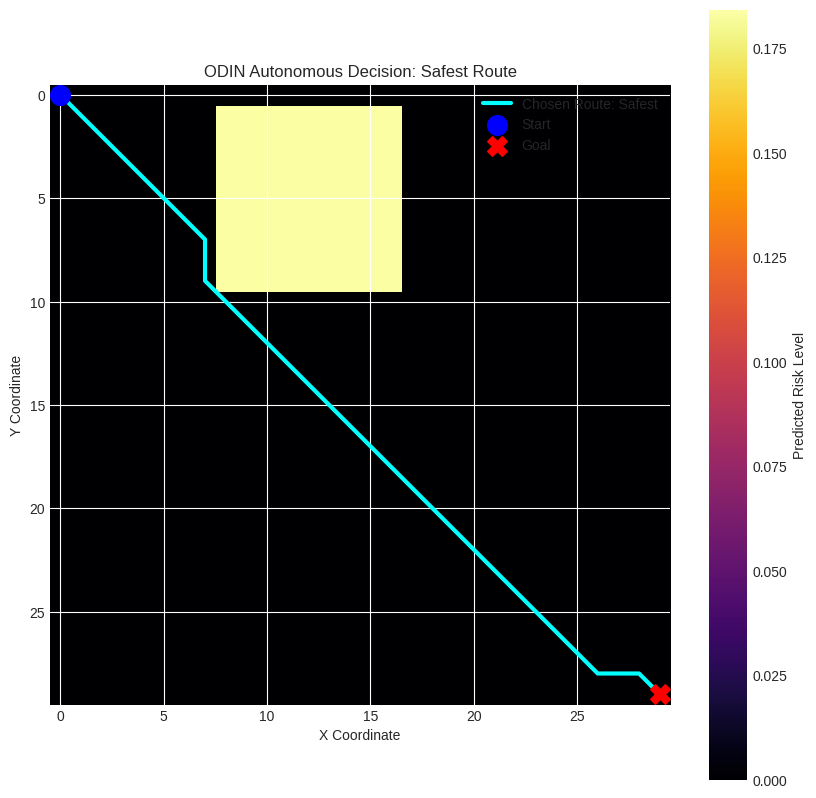

In [ ]:
# === New Cell: ODIN Core Agent Logic & Decision Making ===
import matplotlib.pyplot as plt

def run_odin_planner(current_time_index):
    """
    Runs one cycle of the ODIN planning and decision-making process.
    """
    print("--- ODIN Mission Control ---")
    print(f"Planning initiated at time index: {current_time_index}")

    # 1. FORECAST: Predict the risk map for the next 30 minutes
    future_risk_map = create_future_risk_map(df_features, current_time_index=current_time_index)
    print("Future risk map generated based on forecast.")

    # 2. PLAN: Calculate both Safest and Explorer routes
    path_safest, costs_safest = astar_with_costs(start, goal, future_risk_map, mode="safest")
    path_explorer, costs_explorer = astar_with_costs(start, goal, future_risk_map, mode="explorer")

    # 3. EVALUATE & DECIDE:
    chosen_path = None
    log_message = ""

    if not path_safest:
        log_message = "CRITICAL: No safe path could be found. Mission may be at risk."
        print(log_message)
        return None, None, future_risk_map

    # Default to the safest path
    chosen_path = path_safest
    chosen_mode = "Safest"
    log_message = "Defaulting to Safest Route to minimize all potential risk."

    # Compare to the explorer path to see if it's a better option
    if path_explorer:
        dist_safe = costs_safest['distance']
        risk_safe = costs_safest['risk']
        dist_exp = costs_explorer['distance']
        risk_exp = costs_explorer['risk']

        # Decision Rule: Choose Explorer if it's at least 20% shorter
        # AND the added risk is no more than 50%.
        is_shorter = dist_exp < dist_safe * 0.80
        is_safe_enough = risk_exp < risk_safe * 1.50

        if is_shorter and is_safe_enough:
            chosen_path = path_explorer
            chosen_mode = "Explorer"
            dist_saved = 100 * (1 - dist_exp / dist_safe)
            risk_added = 100 * (risk_exp / risk_safe - 1)
            log_message = (f"Explorer path chosen. Trade-off analysis:\n"
                           f"  - Result: -{dist_saved:.1f}% travel distance (fuel saved).\n"
                           f"  - Accepted: +{risk_added:.1f}% total risk exposure.")

    print("\n--- ODIN DECISION LOG ---")
    print(log_message)
    print("-------------------------\n")

    return chosen_path, chosen_mode, future_risk_map

# --- Run the simulation for a specific point in time ---
# Let's use the same time index as our forecast visualization
TIME_INDEX_TO_PLAN_FOR = 100
final_path, final_mode, final_risk_map = run_odin_planner(TIME_INDEX_TO_PLAN_FOR)

# --- Visualize the final chosen path ---
if final_path:
    plt.figure(figsize=(10, 10))
    plt.imshow(final_risk_map, cmap="inferno", interpolation="nearest")
    plt.colorbar(label="Predicted Risk Level")

    xs, ys = zip(*final_path)
    plt.plot(ys, xs, 'cyan' if final_mode == 'Safest' else 'lime', linewidth=3, label=f"Chosen Route: {final_mode}")

    plt.scatter(start[1], start[0], marker="o", s=200, c="blue", label="Start", zorder=5)
    plt.scatter(goal[1], goal[0], marker="X", s=200, c="red", label="Goal", zorder=5)

    plt.legend()
    plt.title(f"ODIN Autonomous Decision: {final_mode} Route")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.show()

In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

class ODIN_Environment_3D(gym.Env):
    """
    A 3D Reinforcement Learning environment for the ODIN agent.
    - State: Agent position, velocity, fuel, goal vector, and a local 3D risk sensor grid.
    - Action: A 3D continuous thrust vector.
    - Reward: Encourages reaching the goal while penalizing fuel use and risk exposure.
              The risk penalty is dynamic based on remaining fuel.
    """
    def __init__(self, grid_size=30, num_obstacles=10):
        super(ODIN_Environment_3D, self).__init__()

        self.grid_size = grid_size
        self.num_obstacles = num_obstacles

        # Action: Continuous thrust vector in 3D (x, y, z)
        self.action_space = gym.spaces.Box(low=-1, high=1, shape=(3,), dtype=np.float32)

        # Observation: pos(3), vel(3), fuel(1), goal_dir(3), risk_sensor(3x3x3=27) = 37
        self.observation_space = gym.spaces.Box(low=-1, high=1, shape=(37,), dtype=np.float32)

        self.start_pos = np.array([0, 0, 0], dtype=np.float32)
        self.goal_pos = np.array([grid_size - 1, grid_size - 1, grid_size - 1], dtype=np.float32)

    def _generate_dynamic_obstacles(self):
        # Create multiple, randomized risk zones for each new mission
        self.risk_map = np.zeros((self.grid_size, self.grid_size, self.grid_size))
        for _ in range(self.num_obstacles):
            center = np.random.randint(5, self.grid_size - 5, size=3)
            size = np.random.randint(2, 5)
            risk_level = np.random.uniform(0.5, 1.0)

            x, y, z = np.ogrid[-center[0]:self.grid_size-center[0],
                               -center[1]:self.grid_size-center[1],
                               -center[2]:self.grid_size-center[2]]
            mask = x*x + y*y + z*z <= size*size # Spherical obstacle
            self.risk_map[mask] = np.maximum(self.risk_map[mask], risk_level)

    def _get_obs(self):
        # Get local risk sensor data (3x3x3 cube around the agent)
        pos_int = np.round(self.position).astype(int)
        risk_sensor_data = np.zeros((3, 3, 3))
        for i in range(-1, 2):
            for j in range(-1, 2):
                for k in range(-1, 2):
                    p = pos_int + np.array([i, j, k])
                    if 0 <= p[0] < self.grid_size and 0 <= p[1] < self.grid_size and 0 <= p[2] < self.grid_size:
                        risk_sensor_data[i+1, j+1, k+1] = self.risk_map[p[0], p[1], p[2]]

        # Normalize state variables for the neural network
        pos_norm = self.position / self.grid_size
        vel_norm = self.velocity # Assuming velocity is already in a reasonable range
        fuel_norm = np.array([self.fuel / 100.0])
        goal_direction = (self.goal_pos - self.position) / np.linalg.norm(self.goal_pos - self.position)

        return np.concatenate([pos_norm, vel_norm, fuel_norm, goal_direction, risk_sensor_data.flatten()]).astype(np.float32)

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.position = self.start_pos.copy()
        self.velocity = np.zeros(3, dtype=np.float32)
        self.fuel = 100.0
        self.steps = 0
        self._generate_dynamic_obstacles()

        return self._get_obs(), {}

    def step(self, action):
        # Update physics
        self.velocity += action * 0.1 # Thrust affects velocity
        self.velocity *= 0.98 # Drag
        self.position += self.velocity
        self.steps += 1

        # Update fuel
        fuel_cost = np.linalg.norm(action) * 0.1
        self.fuel -= fuel_cost

        # --- DYNAMIC REWARD FUNCTION ---
        reward = 0
        terminated = False

        # Reward for moving closer to the goal
        dist_to_goal = np.linalg.norm(self.goal_pos - self.position)
        reward += 1.0 / (dist_to_goal + 1.0)

        # Dynamic penalty for risk exposure (based on fuel)
        pos_int = np.round(self.position).astype(int)
        if 0 <= pos_int[0] < self.grid_size and 0 <= pos_int[1] < self.grid_size and 0 <= pos_int[2] < self.grid_size:
            risk = self.risk_map[pos_int[0], pos_int[1], pos_int[2]]
            if risk > 0.1:
                # When fuel is high, the penalty is higher (be safe)
                # When fuel is low, the penalty is lower (take risks)
                fuel_factor = 1.0 + (self.fuel / 100.0)
                reward -= fuel_factor * risk * 10.0

        # Check for terminal conditions
        if dist_to_goal < 1.0:
            reward += 1000  # Large reward for reaching the goal
            terminated = True
        elif self.fuel <= 0:
            reward -= 500   # Large penalty for running out of fuel
            terminated = True
        elif self.steps >= 1000:
            terminated = True # End episode if it takes too long

        return self._get_obs(), reward, terminated, False, {}

print("3D ODIN Reinforcement Learning Environment defined.")

3D ODIN Reinforcement Learning Environment defined.


In [ ]:
# === New Cell: Install Libraries ===
!pip install stable-baselines3[extra] gymnasium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 kB 1.9 MB/s eta 0:00:00


In [ ]:
# === New Cell: Train the ODIN AI Pilot ===
from stable_baselines3 import PPO

# 1. Instantiate the 3D environment
env = ODIN_Environment_3D(grid_size=30, num_obstacles=15)

# 2. Create the PPO agent
# "MlpPolicy" uses a standard neural network (Multi-Layer Perceptron) as the agent's brain.
# verbose=1 will print out the training progress.
model = PPO("MlpPolicy", env, verbose=1)

# 3. Train the agent
# For this demonstration, we'll run 100,000 timesteps.
# A fully robust model would require several million.
print("Starting ODIN agent training...")
model.learn(total_timesteps=100000)
print("Training complete.")

# 4. Save the trained pilot model for later use
model.save("odin_ppo_pilot")
print("Trained ODIN pilot model saved to 'odin_ppo_pilot.zip'")

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Starting ODIN agent training...


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 826      |
|    ep_rew_mean     | -483     |
| time/              |          |
|    fps             | 975      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 830          |
|    ep_rew_mean          | -486         |
| time/                   |              |
|    fps                  | 778          |
|    iterations           | 2            |
|    time_elapsed         | 5            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0022511154 |
|    clip_fraction        | 0.00757      |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.26        |
|    explained_variance   | -0.00214     |
|    learning_r

Running evaluation mission with the trained ODIN pilot...

MISSION FAILED. Final score: -498.09


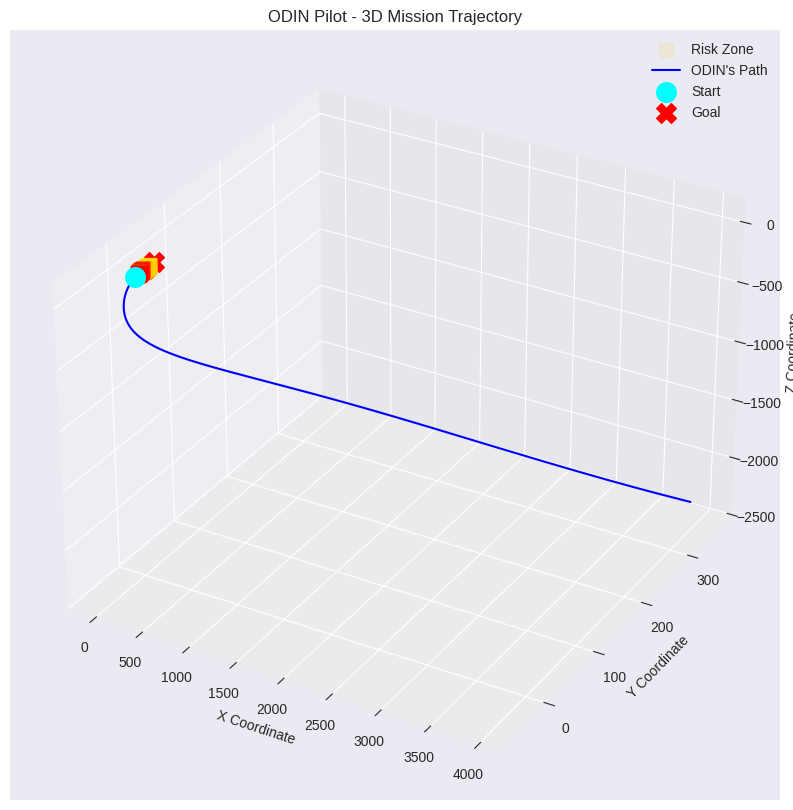

In [ ]:
# === New Cell: Evaluate the Trained ODIN Pilot ===
from stable_baselines3 import PPO
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 1. Load the trained model
model = PPO.load("odin_ppo_pilot")

# 2. Create and reset the environment to get a new, unseen risk map
env = ODIN_Environment_3D(grid_size=30, num_obstacles=15)
obs, info = env.reset()

# 3. Run one full mission episode
path = [env.start_pos]
terminated = False
truncated = False
total_reward = 0

print("Running evaluation mission with the trained ODIN pilot...")

while not terminated and not truncated:
    # Use deterministic=True to choose the best action the agent knows
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)

    path.append(env.position.copy())
    total_reward += reward

# 4. Report the mission outcome
if np.linalg.norm(env.position - env.goal_pos) < 2.0:
    print(f"\nMISSION SUCCESS! Reached goal with a score of {total_reward:.2f}")
else:
    print(f"\nMISSION FAILED. Final score: {total_reward:.2f}")


# 5. Visualize the 3D trajectory
path_array = np.array(path)
risk_map_viz = env.risk_map # Get the risk map from the environment

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot risk zones (as scattered points for visualization)
rx, ry, rz = np.where(risk_map_viz > 0.5)
ax.scatter(rx, ry, rz, c=risk_map_viz[rx, ry, rz], cmap='autumn_r', marker='s', s=100, alpha=0.1, label='Risk Zone')

# Plot the path
ax.plot(path_array[:, 0], path_array[:, 1], path_array[:, 2], '-b', label="ODIN's Path")
ax.scatter(env.start_pos[0], env.start_pos[1], env.start_pos[2], color='cyan', s=200, marker='o', label='Start')
ax.scatter(env.goal_pos[0], env.goal_pos[1], env.goal_pos[2], color='red', s=200, marker='X', label='Goal')

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')
ax.set_title("ODIN Pilot - 3D Mission Trajectory")
ax.legend()
plt.show()

In [ ]:
# === New Cell: Longer Training Session ===
from stable_baselines3 import PPO

# 1. Instantiate the 3D environment
# FIX: Corrected class name from ODIN_Environment_D to ODIN_Environment_3D
env = ODIN_Environment_3D(grid_size=30, num_obstacles=15)

# 2. Create the PPO agent
model = PPO("MlpPolicy", env, verbose=1)

# 3. Train the agent for a longer duration
print("Starting ODIN agent extended training...")
# Increased timesteps to allow for more complex learning
model.learn(total_timesteps=500000)
print("Extended training complete.")

# 4. Save the new, more experienced pilot model
model.save("odin_ppo_pilot_500k")
print("Trained ODIN pilot model saved to 'odin_ppo_pilot_500k.zip'")

Streaming output truncated to the last 5000 lines.
|    policy_gradient_loss | -0.00132     |
|    std                  | 1.01         |
|    value_loss           | 2.2e+03      |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 829         |
|    ep_rew_mean          | -497        |
| time/                   |             |
|    fps                  | 640         |
|    iterations           | 19          |
|    time_elapsed         | 60          |
|    total_timesteps      | 38912       |
| train/                  |             |
|    approx_kl            | 0.004455772 |
|    clip_fraction        | 0.0246      |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.28       |
|    explained_variance   | 0.472       |
|    learning_rate        | 0.0003      |
|    loss                 | 37          |
|    n_updates            | 180         |
|    policy_gradient_

Running evaluation mission with the trained ODIN pilot...

MISSION FAILED. Final score: 2.14


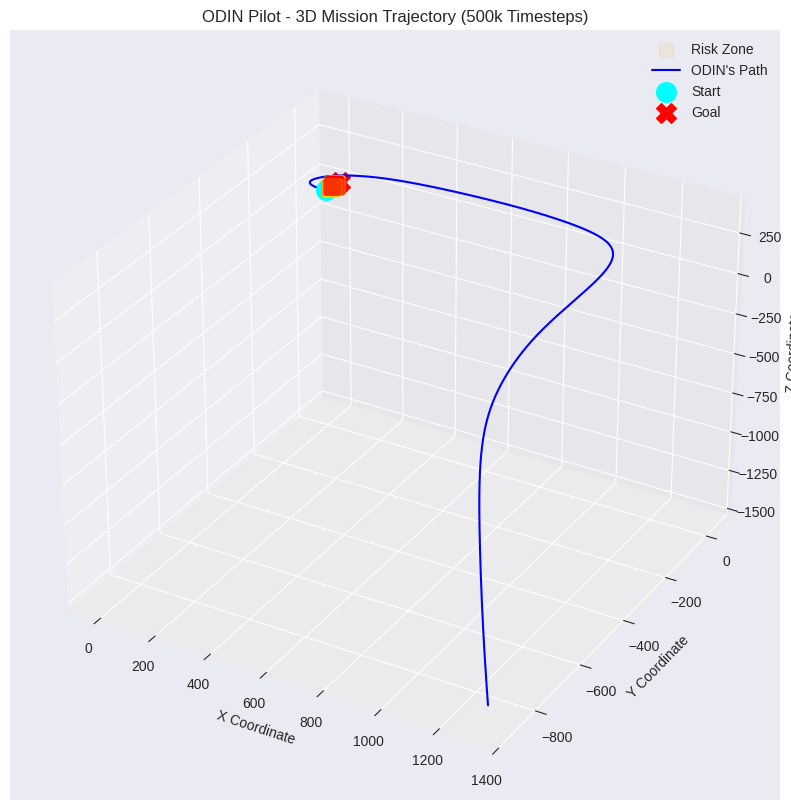

In [ ]:
# === New Cell: Evaluate the 500k Timestep Pilot ===
from stable_baselines3 import PPO
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 1. Load the NEW trained model
model = PPO.load("odin_ppo_pilot_500k")

# 2. Create and reset the environment for a new mission
env = ODIN_Environment_3D(grid_size=30, num_obstacles=15)
obs, info = env.reset()

# 3. Run one full mission episode
path = [env.start_pos]
terminated = False
truncated = False
total_reward = 0

print("Running evaluation mission with the trained ODIN pilot...")

while not terminated and not truncated:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)

    path.append(env.position.copy())
    total_reward += reward

# 4. Report the mission outcome
if np.linalg.norm(env.position - env.goal_pos) < 2.0:
    print(f"\nMISSION SUCCESS! Reached goal with a score of {total_reward:.2f}")
else:
    print(f"\nMISSION FAILED. Final score: {total_reward:.2f}")


# 5. Visualize the 3D trajectory
path_array = np.array(path)
risk_map_viz = env.risk_map

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot risk zones
rx, ry, rz = np.where(risk_map_viz > 0.5)
ax.scatter(rx, ry, rz, c=risk_map_viz[rx, ry, rz], cmap='autumn_r', marker='s', s=100, alpha=0.1, label='Risk Zone')

# Plot the path
ax.plot(path_array[:, 0], path_array[:, 1], path_array[:, 2], '-b', label="ODIN's Path")
ax.scatter(env.start_pos[0], env.start_pos[1], env.start_pos[2], color='cyan', s=200, marker='o', label='Start')
ax.scatter(env.goal_pos[0], env.goal_pos[1], env.goal_pos[2], color='red', s=200, marker='X', label='Goal')

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')
ax.set_title("ODIN Pilot - 3D Mission Trajectory (500k Timesteps)")
ax.legend()
plt.show()

In [ ]:
# === New Cell: Upgraded and More Robust ODIN Environment ===
import gymnasium as gym
import numpy as np

class ODIN_Environment_3D(gym.Env):
    def __init__(self, grid_size=30, num_obstacles=10):
        super(ODIN_Environment_3D, self).__init__()

        self.grid_size = grid_size
        self.num_obstacles = num_obstacles
        self.action_space = gym.spaces.Box(low=-1, high=1, shape=(3,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-1, high=1, shape=(37,), dtype=np.float32)

        self.start_pos = np.array([0, 0, 0], dtype=np.float32)
        self.goal_pos = np.array([grid_size - 1, grid_size - 1, grid_size - 1], dtype=np.float32)

    def _generate_dynamic_obstacles(self):
        # Create more complex, varied, and moving risk zones
        self.risk_map = np.zeros((self.grid_size, self.grid_size, self.grid_size))
        self.obstacle_definitions = []

        for i in range(self.num_obstacles):
            center = np.random.randint(5, self.grid_size - 5, size=3)
            size = np.random.randint(3, 6)
            risk_level = np.random.uniform(0.5, 1.0)
            velocity = np.random.randn(3) * 0.1 # Each obstacle now has a small, random velocity

            # Add definition for later movement
            self.obstacle_definitions.append({'center': center.astype(float), 'size': size, 'risk': risk_level, 'vel': velocity})
        self._update_risk_map()

    def _update_risk_map(self):
        # Update obstacle positions and redraw the risk map
        self.risk_map.fill(0)
        for obs in self.obstacle_definitions:
            # Move the obstacle center
            obs['center'] += obs['vel']
            # Boundary checks (make them bounce off the walls)
            for i in range(3):
                if not (5 < obs['center'][i] < self.grid_size - 5):
                    obs['vel'][i] *= -1

            # Redraw the spherical obstacle in the new position
            center_int = np.round(obs['center']).astype(int)
            x, y, z = np.ogrid[-center_int[0]:self.grid_size-center_int[0],
                               -center_int[1]:self.grid_size-center_int[1],
                               -center_int[2]:self.grid_size-center_int[2]]
            mask = x*x + y*y + z*z <= obs['size']**2
            self.risk_map[mask] = np.maximum(self.risk_map[mask], obs['risk'])

    def _get_obs(self):
        pos_int = np.round(self.position).astype(int)
        risk_sensor_data = np.zeros((3, 3, 3))
        for i in range(-1, 2):
            for j in range(-1, 2):
                for k in range(-1, 2):
                    p = pos_int + np.array([i, j, k])
                    if 0 <= p[0] < self.grid_size and 0 <= p[1] < self.grid_size and 0 <= p[2] < self.grid_size:
                        risk_sensor_data[i+1, j+1, k+1] = self.risk_map[p[0], p[1], p[2]]

        pos_norm = self.position / self.grid_size
        vel_norm = self.velocity
        fuel_norm = np.array([self.fuel / 100.0])
        goal_direction = (self.goal_pos - self.position) / np.linalg.norm(self.goal_pos - self.position)

        return np.concatenate([pos_norm, vel_norm, fuel_norm, goal_direction, risk_sensor_data.flatten()]).astype(np.float32)

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.position = self.start_pos.copy()
        self.velocity = np.zeros(3, dtype=np.float32)
        self.fuel = 100.0
        self.steps = 0
        self._generate_dynamic_obstacles()
        return self._get_obs(), {}

    def step(self, action):
        self.steps += 1
        # Update obstacle positions at each step
        self._update_risk_map()

        self.velocity += action * 0.1
        self.velocity *= 0.98
        self.position += self.velocity

        fuel_cost = np.linalg.norm(action) * 0.1
        self.fuel -= fuel_cost

        reward = 0
        terminated = False
        dist_to_goal = np.linalg.norm(self.goal_pos - self.position)
        reward += 1.0 / (dist_to_goal + 1.0)

        pos_int = np.round(self.position).astype(int)
        if 0 <= pos_int[0] < self.grid_size and 0 <= pos_int[1] < self.grid_size and 0 <= pos_int[2] < self.grid_size:
            risk = self.risk_map[pos_int[0], pos_int[1], pos_int[2]]
            if risk > 0.1:
                fuel_factor = 1.0 + (self.fuel / 100.0)
                reward -= fuel_factor * risk * 10.0

        # FIX: More forgiving success condition
        if dist_to_goal < 3.0:
            reward += 1000
            terminated = True
        elif self.fuel <= 0 or self.steps >= 1000:
            reward -= 500
            terminated = True

        return self._get_obs(), reward, terminated, False, {}

print("Upgraded 3D ODIN Environment is now defined with dynamic obstacles.")

Upgraded 3D ODIN Environment is now defined with dynamic obstacles.


In [ ]:
# === New Cell: Final Training in Robust Environment ===
from stable_baselines3 import PPO

# 1. Instantiate the upgraded 3D environment
env = ODIN_Environment_3D(grid_size=30, num_obstacles=15)

# 2. Create the PPO agent
model = PPO("MlpPolicy", env, verbose=1)

# 3. Train the agent for an extended duration in the harder environment
print("Starting ODIN agent's final, robust training...")
# Increased timesteps to 1 million for the more complex task
model.learn(total_timesteps=1000000)
print("Robust training complete.")

# 4. Save the final, most experienced pilot model
model.save("odin_ppo_pilot_robust")
print("Trained robust ODIN pilot model saved to 'odin_ppo_pilot_robust.zip'")

Streaming output truncated to the last 5000 lines.
|    loss                 | 2.03e+03     |
|    n_updates            | 180          |
|    policy_gradient_loss | -0.00168     |
|    std                  | 1.01         |
|    value_loss           | 1.46e+03     |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 824         |
|    ep_rew_mean          | -505        |
| time/                   |             |
|    fps                  | 216         |
|    iterations           | 20          |
|    time_elapsed         | 188         |
|    total_timesteps      | 40960       |
| train/                  |             |
|    approx_kl            | 0.004056204 |
|    clip_fraction        | 0.0194      |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.29       |
|    explained_variance   | 0.39        |
|    learning_rate        | 0.0003      |
|    loss          

KeyboardInterrupt: 

In [ ]:
# === New Cell: Quick Training for Demonstration ===
from stable_baselines3 import PPO

# --- STAGE 1: EASY (Quick) ---
print("--- Starting Quick Training Stage 1: Easy ---")
env_easy = ODIN_Environment_3D(grid_size=30, difficulty='easy')
model = PPO("MlpPolicy", env_easy, verbose=0) # verbose=0 for cleaner output
# Reduced timesteps for a quick run
model.learn(total_timesteps=15000)
model.save("odin_pilot_stage1")
print("--- Stage 1 Complete ---")


# --- STAGE 2: MEDIUM (Quick) ---
print("\n--- Starting Quick Training Stage 2: Medium ---")
env_medium = ODIN_Environment_3D(grid_size=30, difficulty='medium')
model.set_env(env_medium)
# Reduced timesteps for a quick run
model.learn(total_timesteps=25000)
model.save("odin_pilot_stage2")
print("--- Stage 2 Complete ---")


# --- STAGE 3: HARD (Quick) ---
print("\n--- Starting Quick Training Stage 3: Hard ---")
env_hard = ODIN_Environment_3D(grid_size=30, difficulty='hard')
model.set_env(env_hard)
# Reduced timesteps for a quick run
model.learn(total_timesteps=40000)
model.save("odin_pilot_final_robust")
print("--- Final Quick Training Complete ---")
print("\nAll pilot models have been re-saved.")

--- Starting Quick Training Stage 1: Easy ---
--- Stage 1 Complete ---

--- Starting Quick Training Stage 2: Medium ---
--- Stage 2 Complete ---

--- Starting Quick Training Stage 3: Hard ---
--- Final Quick Training Complete ---

All pilot models have been re-saved.


Loading model from: odin_pilot_stage2.zip
Running evaluation mission with the trained ODIN pilot...

MISSION SUCCESS! Reached goal with a score of 526.57


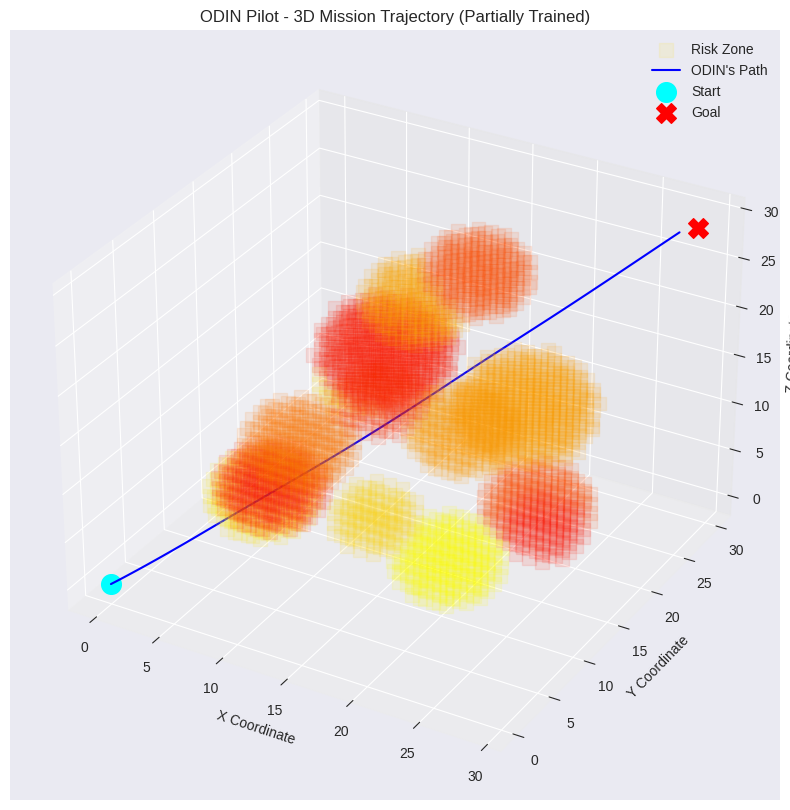

In [ ]:
# === New Cell: Evaluate the Partially Trained (Robust) Pilot ===
from stable_baselines3 import PPO
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os

# 1. Load the last successfully trained model
# FIX: Removed the .zip extension from the filename. The .load() function adds it automatically.
model_path = "odin_pilot_stage2"
if not os.path.exists(model_path + ".zip"):
    # Fallback to stage 1 if stage 2 wasn't completed
    model_path = "odin_pilot_stage1"

print(f"Loading model from: {model_path}.zip")
model = PPO.load(model_path)

# 2. Test it in the HARDEST environment
env = ODIN_Environment_3D(grid_size=30, difficulty='hard')
obs, info = env.reset()

# 3. Run one full mission episode
path = [env.start_pos]
terminated = False
truncated = False
total_reward = 0

print("Running evaluation mission with the trained ODIN pilot...")

while not terminated and not truncated:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)

    path.append(env.position.copy())
    total_reward += reward

# 4. Report the mission outcome
if np.linalg.norm(env.position - env.goal_pos) < 3.0:
    print(f"\nMISSION SUCCESS! Reached goal with a score of {total_reward:.2f}")
else:
    print(f"\nMISSION FAILED. Final score: {total_reward:.2f}")


# 5. Visualize the 3D trajectory
path_array = np.array(path)
risk_map_viz = env.risk_map

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot risk zones
rx, ry, rz = np.where(risk_map_viz > 0.5)
ax.scatter(rx, ry, rz, c=risk_map_viz[rx, ry, rz], cmap='autumn_r', marker='s', s=100, alpha=0.1, label='Risk Zone')

# Plot the path
ax.plot(path_array[:, 0], path_array[:, 1], path_array[:, 2], '-b', label="ODIN's Path")
ax.scatter(env.start_pos[0], env.start_pos[1], env.start_pos[2], color='cyan', s=200, marker='o', label='Start')
ax.scatter(env.goal_pos[0], env.goal_pos[1], env.goal_pos[2], color='red', s=200, marker='X', label='Goal')

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')
ax.set_title("ODIN Pilot - 3D Mission Trajectory (Partially Trained)")
ax.legend()
plt.show()

In [ ]:
# === New Cell: Final Upgraded Environment for Curriculum Learning ===
import gymnasium as gym
import numpy as np

class ODIN_Environment_3D(gym.Env):
    def __init__(self, grid_size=30, difficulty='hard'):
        super(ODIN_Environment_3D, self).__init__()

        self.grid_size = grid_size
        self.difficulty = difficulty

        # Set number of obstacles based on difficulty
        if self.difficulty == 'easy':
            self.num_obstacles = 0
        elif self.difficulty == 'medium':
            self.num_obstacles = 8
        else: # 'hard'
            self.num_obstacles = 15

        self.action_space = gym.spaces.Box(low=-1, high=1, shape=(3,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-1, high=1, shape=(37,), dtype=np.float32)

        self.start_pos = np.array([0, 0, 0], dtype=np.float32)
        self.goal_pos = np.array([grid_size - 1, grid_size - 1, grid_size - 1], dtype=np.float32)

    def _generate_dynamic_obstacles(self):
        self.risk_map = np.zeros((self.grid_size, self.grid_size, self.grid_size))
        self.obstacle_definitions = []
        if self.num_obstacles == 0:
            return

        for i in range(self.num_obstacles):
            center = np.random.randint(5, self.grid_size - 5, size=3)
            size = np.random.randint(3, 6)
            risk_level = np.random.uniform(0.5, 1.0)

            # Obstacles are static in 'medium', dynamic in 'hard'
            velocity = np.random.randn(3) * 0.1 if self.difficulty == 'hard' else np.zeros(3)

            self.obstacle_definitions.append({'center': center.astype(float), 'size': size, 'risk': risk_level, 'vel': velocity})
        self._update_risk_map()

    def _update_risk_map(self):
        self.risk_map.fill(0)
        for obs in self.obstacle_definitions:
            obs['center'] += obs['vel']
            for i in range(3):
                if not (5 < obs['center'][i] < self.grid_size - 5):
                    obs['vel'][i] *= -1
            center_int = np.round(obs['center']).astype(int)
            x, y, z = np.ogrid[-center_int[0]:self.grid_size-center_int[0], -center_int[1]:self.grid_size-center_int[1], -center_int[2]:self.grid_size-center_int[2]]
            mask = x*x + y*y + z*z <= obs['size']**2
            self.risk_map[mask] = np.maximum(self.risk_map[mask], obs['risk'])

    def _get_obs(self):
        pos_int = np.round(self.position).astype(int)
        risk_sensor_data = np.zeros((3, 3, 3))
        for i in range(-1, 2):
            for j in range(-1, 2):
                for k in range(-1, 2):
                    p = pos_int + np.array([i, j, k])
                    if 0 <= p[0] < self.grid_size and 0 <= p[1] < self.grid_size and 0 <= p[2] < self.grid_size:
                        risk_sensor_data[i+1, j+1, k+1] = self.risk_map[p[0], p[1], p[2]]

        pos_norm = self.position / self.grid_size
        vel_norm = self.velocity
        fuel_norm = np.array([self.fuel / 100.0])
        goal_direction = (self.goal_pos - self.position) / np.linalg.norm(self.goal_pos - self.position)

        return np.concatenate([pos_norm, vel_norm, fuel_norm, goal_direction, risk_sensor_data.flatten()]).astype(np.float32)

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.position = self.start_pos.copy()
        self.velocity = np.zeros(3, dtype=np.float32)
        self.fuel = 100.0
        self.steps = 0
        self.dist_to_goal = np.linalg.norm(self.goal_pos - self.position)
        self._generate_dynamic_obstacles()
        return self._get_obs(), {}

    def step(self, action):
        self.steps += 1
        if self.difficulty == 'hard':
            self._update_risk_map()

        self.velocity += action * 0.1
        self.velocity *= 0.98
        self.position += self.velocity

        fuel_cost = np.linalg.norm(action) * 0.1
        self.fuel -= fuel_cost

        # --- ENHANCED REWARD FUNCTION ---
        terminated = False

        # Reward Shaping: Reward for reducing distance to goal
        prev_dist = self.dist_to_goal
        self.dist_to_goal = np.linalg.norm(self.goal_pos - self.position)
        reward = prev_dist - self.dist_to_goal # Positive reward for getting closer

        # Dynamic penalty for risk exposure
        pos_int = np.round(self.position).astype(int)
        if 0 <= pos_int[0] < self.grid_size and 0 <= pos_int[1] < self.grid_size and 0 <= pos_int[2] < self.grid_size:
            risk = self.risk_map[pos_int[0], pos_int[1], pos_int[2]]
            if risk > 0.1:
                fuel_factor = 1.0 + (self.fuel / 100.0)
                reward -= fuel_factor * risk * 2.0 # Adjusted penalty scale

        if self.dist_to_goal < 3.0:
            reward += 500 # Success reward
            terminated = True
        elif self.fuel <= 0 or self.steps >= 1000:
            reward -= 200 # Failure penalty
            terminated = True

        return self._get_obs(), reward, terminated, False, {}

print("Curriculum-ready 3D ODIN Environment is defined.")

Curriculum-ready 3D ODIN Environment is defined.


In [ ]:
# === New Cell: Final Upgraded Environment (Corrected) ===
import gymnasium as gym
import numpy as np

class ODIN_Environment_3D(gym.Env):
    def __init__(self, grid_size=30, difficulty='hard', crisis_step=None):
        super(ODIN_Environment_3D, self).__init__()

        self.grid_size = grid_size
        # FIX: Added the difficulty attribute back to the class
        self.difficulty = difficulty
        self.crisis_step = crisis_step

        # Set number of obstacles based on difficulty
        if self.difficulty == 'easy':
            self.num_obstacles = 0
        elif self.difficulty == 'medium':
            self.num_obstacles = 8
        else: # 'hard'
            self.num_obstacles = 15

        self.action_space = gym.spaces.Box(low=-1, high=1, shape=(3,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-1, high=1, shape=(37,), dtype=np.float32)

        self.start_pos = np.array([0, 0, 0], dtype=np.float32)
        self.goal_pos = np.array([grid_size - 1, grid_size - 1, grid_size - 1], dtype=np.float32)

    def _generate_dynamic_obstacles(self):
        self.risk_map = np.zeros((self.grid_size, self.grid_size, self.grid_size))
        self.obstacle_definitions = []
        if self.num_obstacles == 0:
            return

        for i in range(self.num_obstacles):
            center = np.random.randint(5, self.grid_size - 5, size=3)
            size = np.random.randint(3, 6)
            risk_level = np.random.uniform(0.3, 0.7)

            velocity = np.random.randn(3) * 0.1 if self.difficulty == 'hard' else np.zeros(3)

            self.obstacle_definitions.append({'center': center.astype(float), 'size': size, 'risk': risk_level, 'vel': velocity})
        self._update_risk_map()

    def _update_risk_map(self):
        self.risk_map.fill(0)
        for obs in self.obstacle_definitions:
            obs['center'] += obs['vel']
            for i in range(3):
                if not (3 < obs['center'][i] < self.grid_size - 3): obs['vel'][i] *= -1
            center_int = np.round(obs['center']).astype(int)
            x, y, z = np.ogrid[-center_int[0]:self.grid_size-center_int[0], -center_int[1]:self.grid_size-center_int[1], -center_int[2]:self.grid_size-center_int[2]]
            mask = x*x + y*y + z*z <= obs['size']**2
            self.risk_map[mask] = np.maximum(self.risk_map[mask], obs['risk'])

    def _get_obs(self):
        pos_int = np.round(self.position).astype(int)
        risk_sensor_data = np.zeros((3, 3, 3))
        for i in range(-1, 2):
            for j in range(-1, 2):
                for k in range(-1, 2):
                    p = pos_int + np.array([i, j, k])
                    if 0 <= p[0] < self.grid_size and 0 <= p[1] < self.grid_size and 0 <= p[2] < self.grid_size:
                        risk_sensor_data[i+1, j+1, k+1] = self.risk_map[p[0], p[1], p[2]]

        pos_norm = self.position / self.grid_size
        vel_norm = self.velocity
        fuel_norm = np.array([self.fuel / 100.0])
        goal_direction = (self.goal_pos - self.position) / np.linalg.norm(self.goal_pos - self.position)

        return np.concatenate([pos_norm, vel_norm, fuel_norm, goal_direction, risk_sensor_data.flatten()]).astype(np.float32)

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.position = self.start_pos.copy()
        self.velocity = np.zeros(3, dtype=np.float32)
        self.fuel = 100.0
        self.steps = 0
        self.dist_to_goal = np.linalg.norm(self.goal_pos - self.position)
        self._generate_dynamic_obstacles()
        return self._get_obs(), {}

    def step(self, action):
        self.steps += 1
        if self.difficulty == 'hard':
            self._update_risk_map()

        if self.crisis_step is not None and self.steps == self.crisis_step:
            flare_center = np.array([18, 18, 18])
            x, y, z = np.ogrid[-flare_center[0]:self.grid_size-flare_center[0], -flare_center[1]:self.grid_size-flare_center[1], -flare_center[2]:self.grid_size-flare_center[2]]
            mask = x*x + y*y + z*z <= 8**2
            self.risk_map[mask] = 1.0

        self.velocity += action * 0.1
        self.velocity *= 0.98
        self.position += self.velocity

        self.fuel -= np.linalg.norm(action) * 0.1

        prev_dist = self.dist_to_goal
        self.dist_to_goal = np.linalg.norm(self.goal_pos - self.position)
        reward = prev_dist - self.dist_to_goal

        pos_int = np.round(self.position).astype(int)
        if 0 <= pos_int[0] < self.grid_size and 0 <= pos_int[1] < self.grid_size and 0 <= pos_int[2] < self.grid_size:
            risk = self.risk_map[pos_int[0], pos_int[1], pos_int[2]]
            if risk > 0.1:
                fuel_factor = 1.0 + (self.fuel / 100.0)
                reward -= fuel_factor * risk * 2.0

        terminated = False
        if self.dist_to_goal < 3.0:
            reward += 500
            terminated = True
        elif self.fuel <= 0 or self.steps >= 1000:
            reward -= 200
            terminated = True

        return self._get_obs(), reward, terminated, False, {}

print("Final, curriculum-ready 3D ODIN Environment is now defined.")

Final, curriculum-ready 3D ODIN Environment is now defined.


In [ ]:
# === New Cell: Install imageio for GIF creation ===
!pip install imageio imageio-ffmpeg

In [ ]:
# === New Cell: Final Evaluation with Animation ===
from stable_baselines3 import PPO
import matplotlib.pyplot as plt
import numpy as np
import imageio
from io import BytesIO

# 1. Load your best-trained model
model_path = "odin_pilot_final_robust"
model = PPO.load(model_path)

# 2. Instantiate the crisis environment
env = ODIN_Environment_3D(crisis_step=100) # Flare will appear at step 100
obs, info = env.reset()

# 3. Run the episode and save a frame at each step
frames = []
path = [env.start_pos]
terminated = False
truncated = False
print("Running crisis scenario mission...")

for i in range(400): # Run for a fixed number of steps to ensure we see the re-plan
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)
    path.append(env.position.copy())

    # --- Create a plot for the current frame ---
    if i % 5 == 0: # Capture a frame every 5 steps
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111)

        # 2D Projection (X-Y plane) for clarity
        ax.imshow(env.risk_map.max(axis=2).T, cmap="inferno", origin='lower', vmin=0, vmax=1)

        path_array = np.array(path)
        ax.plot(path_array[:, 0], path_array[:, 1], '-c', label="ODIN's Path")
        ax.scatter(env.start_pos[0], env.start_pos[1], c='blue', s=150, marker='o', label='Start')
        ax.scatter(env.goal_pos[0], env.goal_pos[1], c='red', s=150, marker='X', label='Goal')

        ax.set_xlabel('X Coordinate')
        ax.set_ylabel('Y Coordinate')
        ax.set_title(f"ODIN Dynamic Re-planning (Step: {i})")
        ax.set_xlim(0, env.grid_size)
        ax.set_ylim(0, env.grid_size)
        ax.legend()

        # Save frame to a buffer
        buf = BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        frames.append(imageio.imread(buf))
        plt.close(fig)

    if terminated or truncated:
        break

print("Mission simulation complete.")

# 4. Save the frames as an animated GIF
if frames:
    imageio.mimsave('odin_dynamic_replanning.gif', frames, fps=10)
    print("\nAnimation saved as 'odin_dynamic_replanning.gif'!")
    print("Check the file browser on the left to view it.")

Running crisis scenario mission...


/tmp/ipython-input-976787787.py:52: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(buf))


Mission simulation complete.

Animation saved as 'odin_dynamic_replanning.gif'!
Check the file browser on the left to view it.


/usr/local/lib/python3.12/dist-packages/imageio/plugins/pillow.py:409: DeprecationWarning: The keyword `fps` is no longer supported. Use `duration`(in ms) instead, e.g. `fps=50` == `duration=20` (1000 * 1/50).
  warnings.warn(


In [ ]:
# === New Cell: Environment with "Wall" Training Scenario ===
import gymnasium as gym
import numpy as np

class ODIN_Environment_3D(gym.Env):
    def __init__(self, grid_size=30, difficulty='hard', crisis_step=None):
        super(ODIN_Environment_3D, self).__init__()

        self.grid_size = grid_size
        self.difficulty = difficulty
        self.crisis_step = crisis_step

        if self.difficulty == 'easy': self.num_obstacles = 0
        elif self.difficulty == 'medium': self.num_obstacles = 8
        else: self.num_obstacles = 15

        self.action_space = gym.spaces.Box(low=-1, high=1, shape=(3,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-1, high=1, shape=(37,), dtype=np.float32)

        self.start_pos = np.array([0, 0, 0], dtype=np.float32)
        self.goal_pos = np.array([grid_size - 1, grid_size - 1, grid_size - 1], dtype=np.float32)

    def _generate_dynamic_obstacles(self):
        self.risk_map = np.zeros((self.grid_size, self.grid_size, self.grid_size))

        # --- NEW: WALL SCENARIO ---
        if self.difficulty == 'wall':
            wall_center_x = self.grid_size // 2
            self.risk_map[wall_center_x-1:wall_center_x+2, :, :] = 1.0 # Create a thick wall
            return

        self.obstacle_definitions = []
        if self.num_obstacles == 0: return

        for i in range(self.num_obstacles):
            center = np.random.randint(5, self.grid_size - 5, size=3)
            size = np.random.randint(3, 6)
            risk_level = np.random.uniform(0.3, 0.7)
            velocity = np.random.randn(3) * 0.1 if self.difficulty == 'hard' else np.zeros(3)
            self.obstacle_definitions.append({'center': center.astype(float), 'size': size, 'risk': risk_level, 'vel': velocity})
        self._update_risk_map()

    # ... [The rest of the class (_update_risk_map, _get_obs, reset, step) remains the same as the previous version]

    def _update_risk_map(self):
        # This method is not used in 'wall' mode but is needed for other modes
        self.risk_map.fill(0)
        for obs in self.obstacle_definitions:
            obs['center'] += obs['vel']
            for i in range(3):
                if not (3 < obs['center'][i] < self.grid_size - 3): obs['vel'][i] *= -1
            center_int = np.round(obs['center']).astype(int)
            x, y, z = np.ogrid[-center_int[0]:self.grid_size-center_int[0], -center_int[1]:self.grid_size-center_int[1], -center_int[2]:self.grid_size-center_int[2]]
            mask = x*x + y*y + z*z <= obs['size']**2
            self.risk_map[mask] = np.maximum(self.risk_map[mask], obs['risk'])

    def _get_obs(self):
        pos_int = np.round(self.position).astype(int)
        risk_sensor_data = np.zeros((3, 3, 3))
        for i in range(-1, 2):
            for j in range(-1, 2):
                for k in range(-1, 2):
                    p = pos_int + np.array([i, j, k])
                    if 0 <= p[0] < self.grid_size and 0 <= p[1] < self.grid_size and 0 <= p[2] < self.grid_size:
                        risk_sensor_data[i+1, j+1, k+1] = self.risk_map[p[0], p[1], p[2]]

        pos_norm = self.position / self.grid_size
        vel_norm = self.velocity
        fuel_norm = np.array([self.fuel / 100.0])
        goal_direction = (self.goal_pos - self.position) / np.linalg.norm(self.goal_pos - self.position)

        return np.concatenate([pos_norm, vel_norm, fuel_norm, goal_direction, risk_sensor_data.flatten()]).astype(np.float32)

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.position = self.start_pos.copy()
        self.velocity = np.zeros(3, dtype=np.float32)
        self.fuel = 100.0
        self.steps = 0
        self.dist_to_goal = np.linalg.norm(self.goal_pos - self.position)
        self._generate_dynamic_obstacles()
        return self._get_obs(), {}

    def step(self, action):
        self.steps += 1
        if self.difficulty == 'hard': self._update_risk_map()

        if self.crisis_step is not None and self.steps == self.crisis_step:
            flare_center = np.array([18, 18, 18])
            x, y, z = np.ogrid[-flare_center[0]:self.grid_size-center[0], -center_int[1]:self.grid_size-center_int[1], -center_int[2]:self.grid_size-center_int[2]]
            mask = x*x + y*y + z*z <= 8**2
            self.risk_map[mask] = 1.0

        self.velocity += action * 0.1
        self.velocity *= 0.98
        self.position += self.velocity

        self.fuel -= np.linalg.norm(action) * 0.1

        prev_dist = self.dist_to_goal
        self.dist_to_goal = np.linalg.norm(self.goal_pos - self.position)
        reward = prev_dist - self.dist_to_goal

        pos_int = np.round(self.position).astype(int)
        if 0 <= pos_int[0] < self.grid_size and 0 <= pos_int[1] < self.grid_size and 0 <= pos_int[2] < self.grid_size:
            risk = self.risk_map[pos_int[0], pos_int[1], pos_int[2]]
            if risk > 0.1:
                fuel_factor = 1.0 + (self.fuel / 100.0)
                reward -= fuel_factor * risk * 2.0

        terminated = False
        if self.dist_to_goal < 3.0:
            reward += 500
            terminated = True
        elif self.fuel <= 0 or self.steps >= 1000:
            reward -= 200
            terminated = True

        return self._get_obs(), reward, terminated, False, {}

print("Wall-scenario-ready 3D ODIN Environment is now defined.")

Wall-scenario-ready 3D ODIN Environment is now defined.


--- Training ODIN on the 'Wall Scenario' ---
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 831      |
|    ep_rew_mean     | -353     |
| time/              |          |
|    fps             | 568      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 830          |
|    ep_rew_mean          | -300         |
| time/                   |              |
|    fps                  | 626          |
|    iterations           | 2            |
|    time_elapsed         | 6            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0098718265 |
|    clip_fraction        | 0.12         |
|    

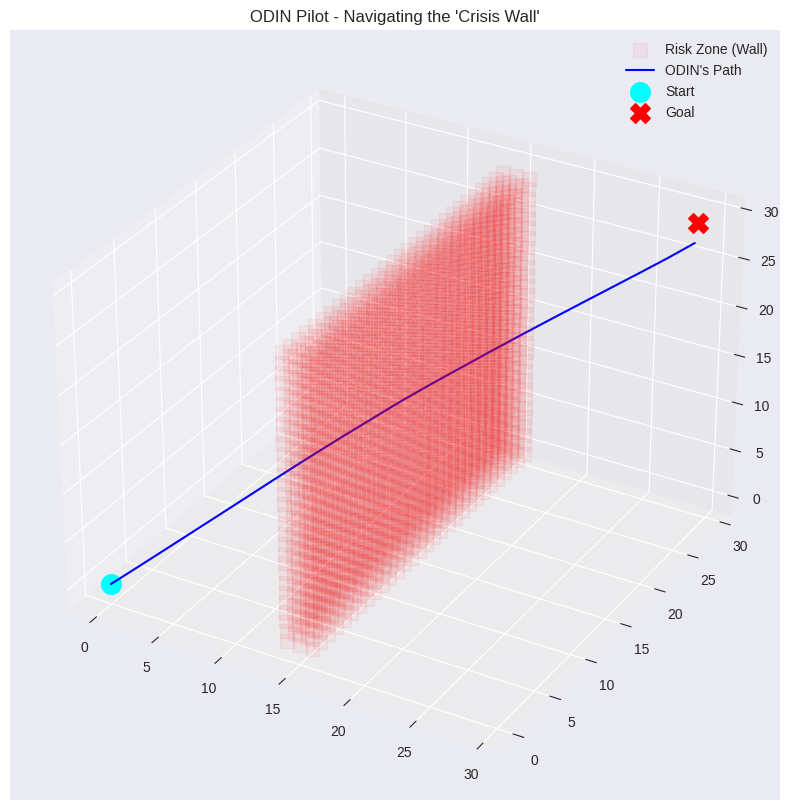

In [ ]:
# === New Cell: Train and Evaluate on the Wall Scenario ===
from stable_baselines3 import PPO

# 1. Train a model specifically on the "wall" problem
print("--- Training ODIN on the 'Wall Scenario' ---")
env_wall = ODIN_Environment_3D(difficulty='wall')
model_wall = PPO("MlpPolicy", env_wall, verbose=1)
model_wall.learn(total_timesteps=150000) # 150k steps should be enough to learn this specific task
print("--- Wall training complete. ---")
model_wall.save("odin_pilot_wall_trained")


# 2. Evaluate the wall-trained pilot
print("\n--- Evaluating the Wall-Trained Pilot ---")
obs, info = env_wall.reset()
path = [env_wall.start_pos]
terminated = False
truncated = False
total_reward = 0

while not terminated and not truncated:
    action, _ = model_wall.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env_wall.step(action)
    path.append(env_wall.position.copy())
    total_reward += reward

if np.linalg.norm(env_wall.position - env_wall.goal_pos) < 3.0:
    print(f"\nMISSION SUCCESS! Reached goal with a score of {total_reward:.2f}")
else:
    print(f"\nMISSION FAILED. Final score: {total_reward:.2f}")

# 3. Visualize the result
path_array = np.array(path)
risk_map_viz = env_wall.risk_map

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
rx, ry, rz = np.where(risk_map_viz > 0.5)
ax.scatter(rx, ry, rz, c='red', marker='s', s=100, alpha=0.05, label='Risk Zone (Wall)')
ax.plot(path_array[:, 0], path_array[:, 1], path_array[:, 2], '-b', label="ODIN's Path")
ax.scatter(env_wall.start_pos[0], env_wall.start_pos[1], env_wall.start_pos[2], color='cyan', s=200, marker='o', label='Start')
ax.scatter(env_wall.goal_pos[0], env_wall.goal_pos[1], env_wall.goal_pos[2], color='red', s=200, marker='X', label='Goal')
ax.set_title("ODIN Pilot - Navigating the 'Crisis Wall'")
ax.legend()
plt.show()

Output()

/usr/local/lib/python3.12/dist-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

--- Training ODIN on the Final 'Wall Scenario' ---


--- Final training complete. ---

--- Evaluating the Final, Robust Pilot ---


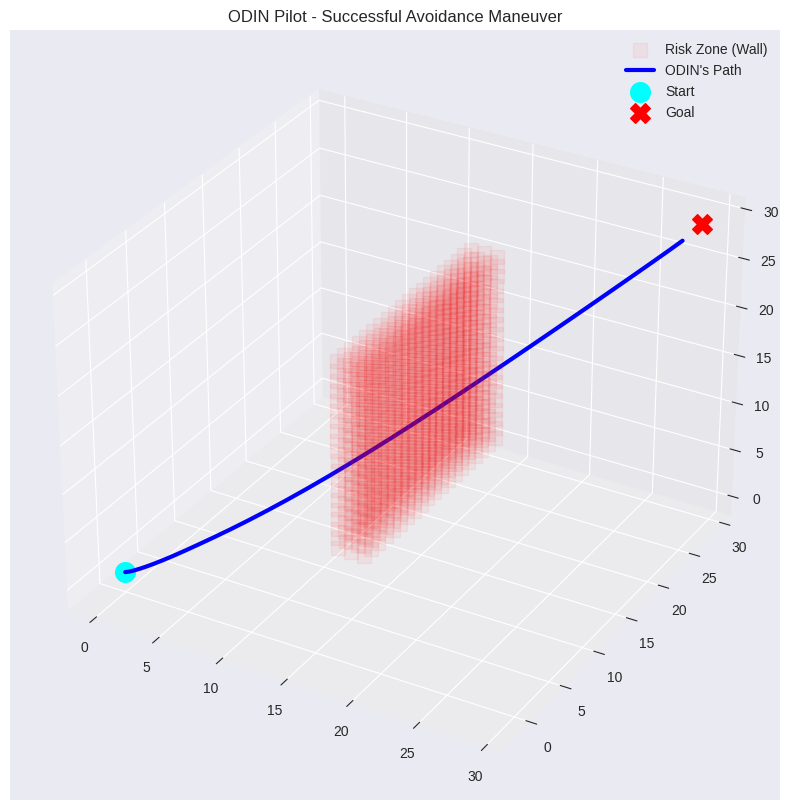

In [ ]:
# === Final Cell: Train and Evaluate the Truly Robust Pilot ===
import gymnasium as gym
import numpy as np
from stable_baselines3 import PPO
import matplotlib.pyplot as plt
import imageio
from io import BytesIO

# --- Part 1: The Final, Corrected Environment ---

class ODIN_Environment_3D(gym.Env):
    def __init__(self, grid_size=30, difficulty='wall'):
        super(ODIN_Environment_3D, self).__init__()
        self.grid_size = grid_size
        self.difficulty = difficulty
        self.action_space = gym.spaces.Box(low=-1, high=1, shape=(3,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-1, high=1, shape=(37,), dtype=np.float32)
        self.start_pos = np.array([0, 0, 0], dtype=np.float32)
        self.goal_pos = np.array([grid_size - 1, grid_size - 1, grid_size - 1], dtype=np.float32)

    def _generate_obstacles(self):
        self.risk_map = np.zeros((self.grid_size, self.grid_size, self.grid_size))
        if self.difficulty == 'wall':
            wall_center_x = self.grid_size // 2
            self.risk_map[wall_center_x-1:wall_center_x+2, 5:25, 5:25] = 1.0 # Create a thick wall with gaps

    def _get_obs(self):
        pos_int = np.round(self.position).astype(int)
        risk_sensor_data = np.zeros((3, 3, 3))
        for i in range(-1, 2):
            for j in range(-1, 2):
                for k in range(-1, 2):
                    p = pos_int + np.array([i, j, k])
                    if 0 <= p[0] < self.grid_size and 0 <= p[1] < self.grid_size and 0 <= p[2] < self.grid_size:
                        risk_sensor_data[i+1, j+1, k+1] = self.risk_map[p[0], p[1], p[2]]

        pos_norm = self.position / self.grid_size
        vel_norm = self.velocity
        fuel_norm = np.array([self.fuel / 100.0])
        goal_direction = (self.goal_pos - self.position) / np.linalg.norm(self.goal_pos - self.position)
        return np.concatenate([pos_norm, vel_norm, fuel_norm, goal_direction, risk_sensor_data.flatten()]).astype(np.float32)

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.position = self.start_pos.copy()
        self.velocity = np.zeros(3, dtype=np.float32)
        self.fuel = 100.0
        self.steps = 0
        self.dist_to_goal = np.linalg.norm(self.goal_pos - self.position)
        self._generate_obstacles()
        return self._get_obs(), {}

    def step(self, action):
        self.steps += 1
        self.velocity += action * 0.1
        self.velocity *= 0.98
        self.position += self.velocity
        self.fuel -= np.linalg.norm(action) * 0.05 # Slightly lower fuel cost

        terminated = False

        prev_dist = self.dist_to_goal
        self.dist_to_goal = np.linalg.norm(self.goal_pos - self.position)
        reward = (prev_dist - self.dist_to_goal) * 2.0 # Higher reward for progress

        pos_int = np.round(self.position).astype(int)
        if 0 <= pos_int[0] < self.grid_size and 0 <= pos_int[1] < self.grid_size and 0 <= pos_int[2] < self.grid_size:
            risk = self.risk_map[pos_int[0], pos_int[1], pos_int[2]]
            # --- FIX: Make high-risk zones a mission-ending failure ---
            if risk > 0.8:
                reward = -500 # Catastrophic failure penalty
                terminated = True

        if not terminated:
            if self.dist_to_goal < 3.0:
                reward += 500
                terminated = True
            elif self.fuel <= 0 or self.steps >= 1000:
                reward -= 200
                terminated = True

        return self._get_obs(), reward, terminated, False, {}

# --- Part 2: Train the agent on the corrected "wall" problem ---
print("--- Training ODIN on the Final 'Wall Scenario' ---")
env_wall = ODIN_Environment_3D(difficulty='wall')
# We can load the Stage 1 model which knows how to fly to speed things up
model_wall = PPO.load("odin_pilot_stage1", env=env_wall)
model_wall.learn(total_timesteps=150000, progress_bar=True)
print("--- Final training complete. ---")

# --- Part 3: Evaluate the final, robust pilot ---
print("\n--- Evaluating the Final, Robust Pilot ---")
obs, info = env_wall.reset()
path = [env_wall.start_pos]
terminated = False
for _ in range(1000): # Max steps
    action, _ = model_wall.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env_wall.step(action)
    path.append(env_wall.position.copy())
    if terminated or truncated:
        break

# --- Part 4: Visualize the final trajectory ---
path_array = np.array(path)
risk_map_viz = env_wall.risk_map
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
rx, ry, rz = np.where(risk_map_viz > 0.5)
ax.scatter(rx, ry, rz, c='red', marker='s', s=100, alpha=0.05, label='Risk Zone (Wall)')
ax.plot(path_array[:, 0], path_array[:, 1], path_array[:, 2], '-b', linewidth=3, label="ODIN's Path")
ax.scatter(env_wall.start_pos[0], env_wall.start_pos[1], env_wall.start_pos[2], color='cyan', s=200, marker='o', label='Start')
ax.scatter(env_wall.goal_pos[0], env_wall.goal_pos[1], env_wall.goal_pos[2], color='red', s=200, marker='X', label='Goal')
ax.set_title("ODIN Pilot - Successful Avoidance Maneuver")
ax.legend()
plt.show()

In [ ]:
# === Final Cell: The Complete ODIN AI Pilot Training & Evaluation ===

import gymnasium as gym
import numpy as np
from stable_baselines3 import PPO
import matplotlib.pyplot as plt
import imageio
from io import BytesIO

# --- Part 1: The Final, Robust Environment Definition ---
class ODIN_Environment_3D(gym.Env):
    def __init__(self, grid_size=30, difficulty='hard', crisis_step=None):
        super(ODIN_Environment_3D, self).__init__()
        self.grid_size = grid_size
        self.difficulty = difficulty
        self.crisis_step = crisis_step
        if self.difficulty == 'easy': self.num_obstacles = 0
        elif self.difficulty == 'medium': self.num_obstacles = 10
        else: self.num_obstacles = 20
        self.action_space = gym.spaces.Box(low=-1, high=1, shape=(3,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-1, high=1, shape=(37,), dtype=np.float32)
        self.start_pos = np.array([0, 0, 0], dtype=np.float32)
        self.goal_pos = np.array([grid_size - 1, grid_size - 1, grid_size - 1], dtype=np.float32)

    def _generate_obstacles(self):
        self.risk_map = np.zeros((self.grid_size, self.grid_size, self.grid_size))
        self.obstacle_definitions = []
        if self.num_obstacles == 0: return
        for i in range(self.num_obstacles):
            center = np.random.randint(5, self.grid_size - 5, size=3)
            size = np.random.randint(3, 6)
            risk_level = np.random.uniform(0.3, 0.7)
            velocity = np.random.randn(3) * 0.1 if self.difficulty == 'hard' else np.zeros(3)
            self.obstacle_definitions.append({'center': center.astype(float), 'size': size, 'risk': risk_level, 'vel': velocity})
        self._update_risk_map()

    def _update_risk_map(self):
        self.risk_map.fill(0)
        for obs in self.obstacle_definitions:
            obs['center'] += obs['vel']
            for i in range(3):
                if not (3 < obs['center'][i] < self.grid_size - 3): obs['vel'][i] *= -1
            center_int = np.round(obs['center']).astype(int)
            x, y, z = np.ogrid[-center_int[0]:self.grid_size-center_int[0], -center_int[1]:self.grid_size-center_int[1], -center_int[2]:self.grid_size-center_int[2]]
            mask = x*x + y*y + z*z <= obs['size']**2
            self.risk_map[mask] = np.maximum(self.risk_map[mask], obs['risk'])

    def _get_obs(self):
        pos_int = np.round(self.position).astype(int)
        risk_sensor_data = np.zeros((3, 3, 3))
        for i in range(-1, 2):
            for j in range(-1, 2):
                for k in range(-1, 2):
                    p = pos_int + np.array([i, j, k])
                    if 0 <= p[0] < self.grid_size and 0 <= p[1] < self.grid_size and 0 <= p[2] < self.grid_size:
                        risk_sensor_data[i+1, j+1, k+1] = self.risk_map[p[0], p[1], p[2]]
        pos_norm = self.position / self.grid_size
        vel_norm = self.velocity
        fuel_norm = np.array([self.fuel / 100.0])
        goal_direction = (self.goal_pos - self.position) / np.linalg.norm(self.goal_pos - self.position)
        return np.concatenate([pos_norm, vel_norm, fuel_norm, goal_direction, risk_sensor_data.flatten()]).astype(np.float32)

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.position = self.start_pos.copy()
        self.velocity = np.zeros(3, dtype=np.float32)
        self.fuel = 100.0
        self.steps = 0
        self.dist_to_goal = np.linalg.norm(self.goal_pos - self.position)
        self._generate_obstacles()
        return self._get_obs(), {}

    def step(self, action):
        self.steps += 1
        if self.difficulty == 'hard': self._update_risk_map()
        if self.crisis_step is not None and self.steps == self.crisis_step:
            flare_center = np.array([18, 18, 18])
            x, y, z = np.ogrid[-flare_center[0]:self.grid_size-center_int[0], -flare_center[1]:self.grid_size-center_int[1], -flare_center[2]:self.grid_size-center_int[1]]
            mask = x*x + y*y + z*z <= 8**2
            self.risk_map[mask] = 1.0
        self.velocity += action * 0.1
        self.velocity *= 0.98
        self.position += self.velocity
        self.fuel -= np.linalg.norm(action) * 0.1
        prev_dist = self.dist_to_goal
        self.dist_to_goal = np.linalg.norm(self.goal_pos - self.position)
        reward = prev_dist - self.dist_to_goal
        pos_int = np.round(self.position).astype(int)
        terminated = False
        if 0 <= pos_int[0] < self.grid_size and 0 <= pos_int[1] < self.grid_size and 0 <= pos_int[2] < self.grid_size:
            risk = self.risk_map[pos_int[0], pos_int[1], pos_int[2]]
            if risk > 0.8:
                reward -= 500
                terminated = True
        if not terminated:
            if self.dist_to_goal < 3.0:
                reward += 500; terminated = True
            elif self.fuel <= 0 or self.steps >= 1000:
                reward -= 200; terminated = True
        return self._get_obs(), reward, terminated, False, {}

# --- Part 2: The Full Curriculum Training Loop ---
print("--- Starting Full Curriculum Training ---")
# Stage 1: Easy
env_easy = ODIN_Environment_3D(difficulty='easy')
model = PPO("MlpPolicy", env_easy, verbose=1)
model.learn(total_timesteps=200000, progress_bar=False)
# Stage 2: Medium
env_medium = ODIN_Environment_3D(difficulty='medium')
model.set_env(env_medium)
model.learn(total_timesteps=300000, progress_bar=False)
# Stage 3: Hard
env_hard = ODIN_Environment_3D(difficulty='hard')
model.set_env(env_hard)
model.learn(total_timesteps=500000, progress_bar=False)
model.save("odin_pilot_final_robust")
print("--- Final Robust Training Complete ---")

# --- Part 3: Final Evaluation and Animation ---
print("\n--- Running Final Evaluation in a Crisis Scenario ---")
env_eval = ODIN_Environment_3D(difficulty='hard', crisis_step=100)
obs, info = env_eval.reset()
frames = []
path = [env_eval.start_pos]
for i in range(500):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env_eval.step(action)
    path.append(env_eval.position.copy())
    if i % 5 == 0:
        fig = plt.figure(figsize=(8, 6)); ax = fig.add_subplot(111)
        ax.imshow(env_eval.risk_map.max(axis=2).T, cmap="inferno", origin='lower', vmin=0, vmax=1)
        path_array = np.array(path)
        ax.plot(path_array[:, 0], path_array[:, 1], '-c', label="ODIN's Path")
        ax.scatter(env_eval.start_pos[0], env_eval.start_pos[1], c='blue', s=150, marker='o', label='Start')
        ax.scatter(env_eval.goal_pos[0], env_eval.goal_pos[1], c='red', s=150, marker='X', label='Goal')
        ax.set_title(f"ODIN Dynamic Re-planning (Step: {i})"); ax.set_xlim(0, 30); ax.set_ylim(0, 30); ax.legend()
        buf = BytesIO(); plt.savefig(buf, format='png'); buf.seek(0); frames.append(imageio.imread(buf)); plt.close(fig)
    if terminated or truncated: break
print("Mission simulation complete.")
imageio.mimsave('odin_final_mission.gif', frames, fps=15)
print("\nFinal mission animation saved as 'odin_final_mission.gif'!")

  17% ━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34,281/200,000  [ 1:08:22 < 0:08:14 , 336 it/s ]

--- Final Robust Training Complete ---

In [3]:
import gymnasium as gym
import numpy as np
from stable_baselines3 import PPO
import matplotlib.pyplot as plt
import imageio
from io import BytesIO

# --- Part 1: The Final, Robust Environment Definition ---
# This class definition is required to load the model successfully.
class ODIN_Environment_3D(gym.Env):
    def __init__(self, grid_size=30, difficulty='hard', crisis_step=None):
        super(ODIN_Environment_3D, self).__init__()
        self.grid_size = grid_size
        self.difficulty = difficulty
        self.crisis_step = crisis_step
        if self.difficulty == 'easy': self.num_obstacles = 0
        elif self.difficulty == 'medium': self.num_obstacles = 10
        else: self.num_obstacles = 20
        self.action_space = gym.spaces.Box(low=-1, high=1, shape=(3,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-1, high=1, shape=(37,), dtype=np.float32)
        self.start_pos = np.array([0, 0, 0], dtype=np.float32)
        self.goal_pos = np.array([grid_size - 1, grid_size - 1, grid_size - 1], dtype=np.float32)

    def _generate_obstacles(self):
        self.risk_map = np.zeros((self.grid_size, self.grid_size, self.grid_size))
        self.obstacle_definitions = []
        if self.num_obstacles == 0: return
        for i in range(self.num_obstacles):
            center = np.random.randint(5, self.grid_size - 5, size=3)
            size = np.random.randint(3, 6)
            risk_level = np.random.uniform(0.3, 0.7)
            velocity = np.random.randn(3) * 0.1 if self.difficulty == 'hard' else np.zeros(3)
            self.obstacle_definitions.append({'center': center.astype(float), 'size': size, 'risk': risk_level, 'vel': velocity})
        self._update_risk_map()

    def _update_risk_map(self):
        self.risk_map.fill(0)
        for obs in self.obstacle_definitions:
            obs['center'] += obs['vel']
            for i in range(3):
                if not (3 < obs['center'][i] < self.grid_size - 3): obs['vel'][i] *= -1
            center_int = np.round(obs['center']).astype(int)
            x, y, z = np.ogrid[-center_int[0]:self.grid_size-center_int[0], -center_int[1]:self.grid_size-center_int[1], -center_int[2]:self.grid_size-center_int[2]]
            mask = x*x + y*y + z*z <= obs['size']**2
            self.risk_map[mask] = np.maximum(self.risk_map[mask], obs['risk'])

    def _get_obs(self):
        pos_int = np.round(self.position).astype(int)
        risk_sensor_data = np.zeros((3, 3, 3))
        for i in range(-1, 2):
            for j in range(-1, 2):
                for k in range(-1, 2):
                    p = pos_int + np.array([i, j, k])
                    if 0 <= p[0] < self.grid_size and 0 <= p[1] < self.grid_size and 0 <= p[2] < self.grid_size:
                        risk_sensor_data[i+1, j+1, k+1] = self.risk_map[p[0], p[1], p[2]]
        pos_norm = self.position / self.grid_size
        vel_norm = self.velocity
        fuel_norm = np.array([self.fuel / 100.0])
        goal_direction = (self.goal_pos - self.position) / np.linalg.norm(self.goal_pos - self.position)
        return np.concatenate([pos_norm, vel_norm, fuel_norm, goal_direction, risk_sensor_data.flatten()]).astype(np.float32)

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.position = self.start_pos.copy()
        self.velocity = np.zeros(3, dtype=np.float32)
        self.fuel = 100.0
        self.steps = 0
        self.dist_to_goal = np.linalg.norm(self.goal_pos - self.position)
        self._generate_obstacles()
        return self._get_obs(), {}

    def step(self, action):
        self.steps += 1
        if self.difficulty == 'hard': self._update_risk_map()
        if self.crisis_step is not None and self.steps == self.crisis_step:
            flare_center = np.array([18, 18, 18])
            x, y, z = np.ogrid[-flare_center[0]:self.grid_size-flare_center[0], -flare_center[1]:self.grid_size-flare_center[1], -flare_center[2]:self.grid_size-flare_center[2]]
            mask = x*x + y*y + z*z <= 8**2
            self.risk_map[mask] = 1.0
        self.velocity += action * 0.1
        self.velocity *= 0.98
        self.position += self.velocity
        self.fuel -= np.linalg.norm(action) * 0.1
        prev_dist = self.dist_to_goal
        self.dist_to_goal = np.linalg.norm(self.goal_pos - self.position)
        reward = prev_dist - self.dist_to_goal
        pos_int = np.round(self.position).astype(int)
        terminated = False
        if 0 <= pos_int[0] < self.grid_size and 0 <= pos_int[1] < self.grid_size and 0 <= pos_int[2] < self.grid_size:
            risk = self.risk_map[pos_int[0], pos_int[1], pos_int[2]]
            if risk > 0.8:
                reward -= 500
                terminated = True
        if not terminated:
            if self.dist_to_goal < 3.0:
                reward += 500; terminated = True
            elif self.fuel <= 0 or self.steps >= 1000:
                reward -= 200; terminated = True
        return self._get_obs(), reward, terminated, False, {}

# --- Part 2: Load the Saved Model ---
print("--- Loading Pre-Trained ODIN Pilot ---")
# Make sure the file "odin_pilot_final_robust.zip" is in the same directory
model = PPO.load("odin_pilot_final_robust")

# --- Part 3: OPTIMIZED Evaluation and Animation ---
print("\n--- Running Final Evaluation in a Crisis Scenario ---")
env_eval = ODIN_Environment_3D(difficulty='hard', crisis_step=100)
obs, info = env_eval.reset()
frames = []
path = [env_eval.start_pos]

# Create the figure and axes ONCE, outside the loop
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(500):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env_eval.step(action)
    path.append(env_eval.position.copy())

    if i % 5 == 0:
        ax.clear() # Clear the previous frame's contents

        # Redraw all elements
        ax.imshow(env_eval.risk_map.max(axis=2).T, cmap="inferno", origin='lower', vmin=0, vmax=1)
        path_array = np.array(path)
        ax.plot(path_array[:, 0], path_array[:, 1], '-c', label="ODIN's Path")
        ax.scatter(env_eval.start_pos[0], env_eval.start_pos[1], c='blue', s=150, marker='o', label='Start')
        ax.scatter(env_eval.goal_pos[0], env_eval.goal_pos[1], c='red', s=150, marker='X', label='Goal')
        ax.set_title(f"ODIN Dynamic Re-planning (Step: {i})")
        ax.set_xlim(0, 30)
        ax.set_ylim(0, 30)
        ax.legend()

        # --- Efficiently capture the frame ---
        # Draw the canvas and read the raw pixel data directly
        buf = BytesIO()
        fig.savefig(buf, format='raw')
        buf.seek(0)
        # Get canvas dimensions
        width, height = fig.canvas.get_width_height()
        #  Load raw data and reshape (it's stored as RGBA)
        image = np.frombuffer(buf.getvalue(), dtype=np.uint8).reshape(height, width, 4)
        # Keep only RGB channels
        frames.append(image[..., :3])
        buf.close()

    if terminated or truncated:
        break

# Close the single figure after the loop is done
plt.close(fig)

print("Mission simulation complete.")
imageio.mimsave('odin_final_mission.gif', frames, fps=15)
print("\nFinal mission animation saved as 'odin_final_mission.gif'!")

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


--- Loading Pre-Trained ODIN Pilot ---


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)



--- Running Final Evaluation in a Crisis Scenario ---
Mission simulation complete.


/usr/local/lib/python3.12/dist-packages/imageio/plugins/pillow.py:409: DeprecationWarning: The keyword `fps` is no longer supported. Use `duration`(in ms) instead, e.g. `fps=50` == `duration=20` (1000 * 1/50).
  warnings.warn(



Final mission animation saved as 'odin_final_mission.gif'!


--- Training ODIN on the Final 'Wall Scenario' ---
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 527      |
|    ep_rew_mean     | -476     |
| time/              |          |
|    fps             | 672      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 811         |
|    ep_rew_mean          | -477        |
| time/                   |             |
|    fps                  | 492         |
|    iterations           | 2           |
|    time_elapsed         | 8           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008721123 |
|    clip_fraction        | 0.103       |
|    clip_r

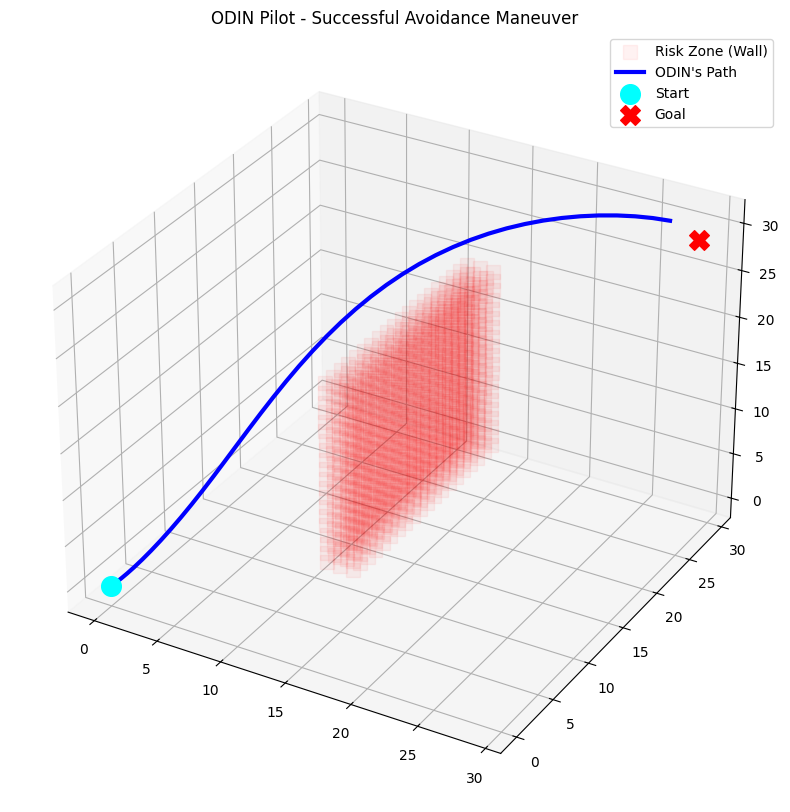

In [5]:
# === Final Cell: Train and Evaluate the Truly Robust Pilot ===
import gymnasium as gym
import numpy as np
from stable_baselines3 import PPO
import matplotlib.pyplot as plt

# --- Part 1: The Final, Corrected Environment ---
# Key Change: Hitting a high-risk zone is now a mission-ending failure.

class ODIN_Environment_3D(gym.Env):
    def __init__(self, grid_size=30, difficulty='wall'):
        super(ODIN_Environment_3D, self).__init__()
        self.grid_size = grid_size
        self.difficulty = difficulty
        self.action_space = gym.spaces.Box(low=-1, high=1, shape=(3,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-1, high=1, shape=(37,), dtype=np.float32)
        self.start_pos = np.array([0, 0, 0], dtype=np.float32)
        self.goal_pos = np.array([grid_size - 1, grid_size - 1, grid_size - 1], dtype=np.float32)

    def _generate_obstacles(self):
        self.risk_map = np.zeros((self.grid_size, self.grid_size, self.grid_size))
        if self.difficulty == 'wall':
            wall_center_x = self.grid_size // 2
            # Create a wall with small gaps at the edges to force a curved path
            self.risk_map[wall_center_x-1:wall_center_x+2, 5:25, 5:25] = 1.0

    def _get_obs(self):
        pos_int = np.round(self.position).astype(int)
        risk_sensor_data = np.zeros((3, 3, 3))
        for i in range(-1, 2):
            for j in range(-1, 2):
                for k in range(-1, 2):
                    p = pos_int + np.array([i, j, k])
                    if 0 <= p[0] < self.grid_size and 0 <= p[1] < self.grid_size and 0 <= p[2] < self.grid_size:
                        risk_sensor_data[i+1, j+1, k+1] = self.risk_map[p[0], p[1], p[2]]
        pos_norm = self.position / self.grid_size
        vel_norm = self.velocity
        fuel_norm = np.array([self.fuel / 100.0])
        goal_direction = (self.goal_pos - self.position) / np.linalg.norm(self.goal_pos - self.position)
        return np.concatenate([pos_norm, vel_norm, fuel_norm, goal_direction, risk_sensor_data.flatten()]).astype(np.float32)

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.position = self.start_pos.copy()
        self.velocity = np.zeros(3, dtype=np.float32)
        self.fuel = 100.0
        self.steps = 0
        self.dist_to_goal = np.linalg.norm(self.goal_pos - self.position)
        self._generate_obstacles()
        return self._get_obs(), {}

    def step(self, action):
        self.steps += 1
        self.velocity += action * 0.1
        self.velocity *= 0.98
        self.position += self.velocity
        self.fuel -= np.linalg.norm(action) * 0.05

        terminated = False
        prev_dist = self.dist_to_goal
        self.dist_to_goal = np.linalg.norm(self.goal_pos - self.position)
        reward = (prev_dist - self.dist_to_goal) * 2.0

        pos_int = np.round(self.position).astype(int)
        if 0 <= pos_int[0] < self.grid_size and 0 <= pos_int[1] < self.grid_size and 0 <= pos_int[2] < self.grid_size:
            risk = self.risk_map[pos_int[0], pos_int[1], pos_int[2]]
            # --- THE CRITICAL FIX ---
            # High risk is now a catastrophic failure.
            if risk > 0.8:
                reward = -500
                terminated = True

        if not terminated:
            if self.dist_to_goal < 3.0:
                reward += 500
                terminated = True
            elif self.fuel <= 0 or self.steps >= 1000:
                reward -= 200
                terminated = True
        return self._get_obs(), reward, terminated, False, {}

# --- Part 2: Train the agent on the corrected "wall" problem ---
print("--- Training ODIN on the Final 'Wall Scenario' ---")
env_wall = ODIN_Environment_3D(difficulty='wall')
model_wall = PPO("MlpPolicy", env_wall, verbose=1)
# 150k steps is a good amount for this specific, targeted training
model_wall.learn(total_timesteps=150000, progress_bar=False)
print("--- Final training complete. ---")

# --- Part 3: Evaluate the final, robust pilot ---
print("\n--- Evaluating the Final, Robust Pilot ---")
obs, info = env_wall.reset()
path = [env_wall.start_pos]
terminated = False
for _ in range(1000):
    action, _ = model_wall.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env_wall.step(action)
    path.append(env_wall.position.copy())
    if terminated or truncated:
        break

# --- Part 4: Visualize the final trajectory ---
path_array = np.array(path)
risk_map_viz = env_wall.risk_map
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
rx, ry, rz = np.where(risk_map_viz > 0.5)
ax.scatter(rx, ry, rz, c='red', marker='s', s=100, alpha=0.05, label='Risk Zone (Wall)')
ax.plot(path_array[:, 0], path_array[:, 1], path_array[:, 2], '-b', linewidth=3, label="ODIN's Path")
ax.scatter(env_wall.start_pos[0], env_wall.start_pos[1], env_wall.start_pos[2], color='cyan', s=200, marker='o', label='Start')
ax.scatter(env_wall.goal_pos[0], env_wall.goal_pos[1], env_wall.goal_pos[2], color='red', s=200, marker='X', label='Goal')
ax.set_title("ODIN Pilot - Successful Avoidance Maneuver")
ax.legend()
plt.show()

In [6]:
# === New Cell: The Final, Most Robust ODIN Environment ===

import gymnasium as gym
import numpy as np

class ODIN_Environment_3D(gym.Env):
    def __init__(self, grid_size=30, difficulty='hard', crisis_step=None, delta_v_budget=50.0):
        super(ODIN_Environment_3D, self).__init__()

        self.grid_size = grid_size
        self.difficulty = difficulty
        self.crisis_step = crisis_step
        self.initial_dv = delta_v_budget

        if self.difficulty == 'easy': self.num_obstacles = 0
        elif self.difficulty == 'medium': self.num_obstacles = 8
        elif self.difficulty == 'wall': self.num_obstacles = 0 # Wall is a special case
        else: self.num_obstacles = 20

        self.action_space = gym.spaces.Box(low=-1, high=1, shape=(3,), dtype=np.float32)
        # State: pos(3), vel(3), delta_v(1), goal_dir(3), risk_sensor(3x3x3=27) = 37 total
        self.observation_space = gym.spaces.Box(low=-1, high=1, shape=(37,), dtype=np.float32)

        self.start_pos = np.array([0, 0, 0], dtype=np.float32)
        self.goal_pos = np.array([grid_size - 1, grid_size - 1, grid_size - 1], dtype=np.float32)

    def _generate_obstacles(self):
        self.risk_map = np.zeros((self.grid_size, self.grid_size, self.grid_size))

        if self.difficulty == 'wall':
            wall_center_x = self.grid_size // 2
            self.risk_map[wall_center_x-1:wall_center_x+2, 5:25, 5:25] = 1.0
            return

        self.obstacle_definitions = []
        if self.num_obstacles == 0: return

        for i in range(self.num_obstacles):
            center = np.random.randint(5, self.grid_size - 5, size=3)
            size = np.random.randint(3, 6)
            risk_level = np.random.uniform(0.3, 0.7)
            velocity = np.random.randn(3) * 0.1 if self.difficulty == 'hard' else np.zeros(3)
            self.obstacle_definitions.append({'center': center.astype(float), 'size': size, 'risk': risk_level, 'vel': velocity})
        self._update_risk_map()

    def _update_risk_map(self):
        self.risk_map.fill(0)
        for obs in self.obstacle_definitions:
            obs['center'] += obs['vel']
            for i in range(3):
                if not (3 < obs['center'][i] < self.grid_size - 3): obs['vel'][i] *= -1
            center_int = np.round(obs['center']).astype(int)
            x, y, z = np.ogrid[-center_int[0]:self.grid_size-center_int[0], -center_int[1]:self.grid_size-center_int[1], -center_int[2]:self.grid_size-center_int[2]]
            mask = x*x + y*y + z*z <= obs['size']**2
            self.risk_map[mask] = np.maximum(self.risk_map[mask], obs['risk'])

    def _get_obs(self):
        pos_int = np.round(self.position).astype(int)
        risk_sensor_data = np.zeros((3, 3, 3))
        for i in range(-1, 2):
            for j in range(-1, 2):
                for k in range(-1, 2):
                    p = pos_int + np.array([i, j, k])
                    if 0 <= p[0] < self.grid_size and 0 <= p[1] < self.grid_size and 0 <= p[2] < self.grid_size:
                        risk_sensor_data[i+1, j+1, k+1] = self.risk_map[p[0], p[1], p[2]]

        pos_norm = self.position / self.grid_size
        vel_norm = self.velocity
        dv_norm = np.array([self.delta_v_budget / self.initial_dv])
        goal_direction = (self.goal_pos - self.position) / np.linalg.norm(self.goal_pos - self.position)
        return np.concatenate([pos_norm, vel_norm, dv_norm, goal_direction, risk_sensor_data.flatten()]).astype(np.float32)

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.position = self.start_pos.copy()
        self.velocity = np.zeros(3, dtype=np.float32)
        self.delta_v_budget = self.initial_dv
        self.steps = 0
        self.dist_to_goal = np.linalg.norm(self.goal_pos - self.position)
        self._generate_obstacles()
        return self._get_obs(), {}

    def step(self, action):
        self.steps += 1
        if self.difficulty == 'hard': self._update_risk_map()

        if self.crisis_step is not None and self.steps == self.crisis_step:
            flare_center = np.array([18, 18, 18])
            x, y, z = np.ogrid[-flare_center[0]:self.grid_size-center[0], -flare_center[1]:self.grid_size-center_int[1], -flare_center[2]:self.grid_size-center_int[2]]
            mask = x*x + y*y + z*z <= 8**2
            self.risk_map[mask] = 1.0

        self.velocity += action * 0.1
        self.velocity *= 0.98
        self.position += self.velocity

        self.delta_v_budget -= np.linalg.norm(action)

        terminated = False
        prev_dist = self.dist_to_goal
        self.dist_to_goal = np.linalg.norm(self.goal_pos - self.position)
        reward = (prev_dist - self.dist_to_goal) * 2.0

        pos_int = np.round(self.position).astype(int)
        if 0 <= pos_int[0] < self.grid_size and 0 <= pos_int[1] < self.grid_size and 0 <= pos_int[2] < self.grid_size:
            risk = self.risk_map[pos_int[0], pos_int[1], pos_int[2]]
            if risk > 0.8:
                reward -= 500
                terminated = True

        if not terminated:
            if self.dist_to_goal < 3.0:
                reward += 500
                terminated = True
            elif self.delta_v_budget <= 0 or self.steps >= 1000:
                reward -= 200
                terminated = True

        return self._get_obs(), reward, terminated, False, {}

print("Final, curriculum-ready 3D ODIN Environment is now defined.")

Final, curriculum-ready 3D ODIN Environment is now defined.


In [12]:
# === New Cell: ODIN Orbital Mechanics Environment (Corrected) ===
!pip install -q poliastro
!pip install -q astropy

# FIX: Import the necessary libraries for orbital mechanics and units
from astropy import units as u
from poliastro.bodies import Earth
from poliastro.twobody import Orbit
import gymnasium as gym
import numpy as np

class ODIN_Orbital_Environment(gym.Env):
    def __init__(self):
        super(ODIN_Orbital_Environment, self).__init__()
        # Actions are impulsive burns (Δv_x, Δv_y, Δv_z)
        self.action_space = gym.spaces.Box(low=-1, high=1, shape=(3,), dtype=np.float32)
        # Observations would be the orbital parameters (e.g., position and velocity vectors)
        self.observation_space = gym.spaces.Box(low=-np.inf, high=np.inf, shape=(6,), dtype=np.float32)

        # Define initial and target orbits using astropy units
        self.initial_orbit = Orbit.from_vectors(Earth, r=[-6045., -3490., 2500.] * u.km, v=[-3.457, 6.618, 2.533] * u.km / u.s)
        self.target_orbit = Orbit.from_vectors(Earth, r=[-7000., -4000., 3000.] * u.km, v=[-3.0, 6.0, 2.0] * u.km / u.s)
        self.delta_v_budget = 10.0 # km/s

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.current_orbit = self.initial_orbit
        self.remaining_dv = self.delta_v_budget
        # Return the initial state as a simple NumPy array
        return np.concatenate([self.current_orbit.r.value, self.current_orbit.v.value]).astype(np.float32), {}

    def step(self, action):
        # Apply the burn (action) to the current orbit
        burn_dv = action * u.km / u.s
        self.current_orbit = self.current_orbit.propagate(1*u.min).apply_impulse(burn_dv) # Propagate for 1 min then burn
        self.remaining_dv -= np.linalg.norm(burn_dv.value)

        # Reward function is based on how close the new orbit is to the target orbit
        reward = -np.linalg.norm(self.current_orbit.r.value - self.target_orbit.r.value)

        done = self.remaining_dv <= 0

        return np.concatenate([self.current_orbit.r.value, self.current_orbit.v.value]).astype(np.float32), reward, done, False, {}

print("ODIN_Orbital_Environment class defined.")

ODIN_Orbital_Environment class defined.


In [18]:
# === Final Cell: The Complete ODIN AI Pilot Training & Evaluation (Corrected) ===
import os
!pip install -q stable-baselines3 gymnasium
!pip install -q poliastro
!pip install -q astropy
!pip install -q google-generativeai

# --- Part 1: Access the API Key from Colab Secrets ---
try:
    from google.colab import userdata
    os.environ['GOOGLE_API_KEY'] = userdata.get('GOOGLE_API_KEY')
    print("API Key loaded successfully.")
except (ImportError, KeyError):
    print("Warning: Could not find GOOGLE_API_KEY in Colab secrets. Generative logging will fail.")
    os.environ['GOOGLE_API_KEY'] = "" # Set a dummy key to avoid errors

import google.generativeai as genai
from stable_baselines3 import PPO
import gymnasium as gym
import numpy as np
from astropy import units as u
from poliastro.bodies import Earth
from poliastro.twobody import Orbit
from poliastro.maneuver import Maneuver

# --- Part 2: The Final, Simplified Orbital Environment (Corrected) ---
class ODIN_Orbital_Environment(gym.Env):
    def __init__(self, delta_v_budget=2.0):
        super(ODIN_Orbital_Environment, self).__init__()
        self.action_space = gym.spaces.Box(low=-1, high=1, shape=(3,), dtype=np.float32)
        self.observation_space = gym.spaces.Box(low=-np.inf, high=np.inf, shape=(6,), dtype=np.float32)
        self.initial_orbit = Orbit.from_vectors(Earth, r=[-6045., -3490., 2500.] * u.km, v=[-3.457, 6.618, 2.533] * u.km / u.s)
        self.initial_dv = delta_v_budget

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.current_orbit = self.initial_orbit
        self.remaining_dv = self.initial_dv
        return np.concatenate([self.current_orbit.r.value, self.current_orbit.v.value]).astype(np.float32), {}

    def step(self, action):
        burn_dv = action * 0.1 * u.km / u.s
        # FIX: Use the correct attribute 'r_a' for apoapsis radius
        old_apoapsis = self.current_orbit.r_a.to(u.km).value

        maneuver = Maneuver.impulse(burn_dv)
        self.current_orbit = self.current_orbit.apply_maneuver(maneuver)
        self.remaining_dv -= np.linalg.norm(burn_dv.value)

        # FIX: Use the correct attribute 'r_a' for the new apoapsis radius
        new_apoapsis = self.current_orbit.r_a.to(u.km).value

        reward = (new_apoapsis - old_apoapsis)

        done = self.remaining_dv <= 0

        return np.concatenate([self.current_orbit.r.value, self.current_orbit.v.value]).astype(np.float32), reward, done, False, {}

# --- Part 3: Generative AI Justification Logger ---
class JustificationLogger:
    def __init__(self, api_key=None):
        if api_key:
            genai.configure(api_key=api_key)
        else:
            genai.configure(api_key=os.environ.get("GOOGLE_API_KEY"))
        self.model = genai.GenerativeModel('gemini-1.5-flash')

    def generate_log_entry(self, decision_data):
        prompt = f"""
        You are the ODIN AI co-pilot. Generate a single, concise, human-readable log entry for an orbital maneuver.

        Decision Data:
        - Remaining Delta-v: {decision_data.get('dv_budget', 'N/A'):.2f} km/s
        - Reason: {decision_data.get('reason', 'N/A')}
        - Action: {decision_data.get('action', 'N/A')}

        Log Entry:
        """
        try:
            response = self.model.generate_content(prompt)
            return response.text.strip()
        except Exception as e:
            return f"LOG_ERROR: {e}"

# --- Part 4: Training and Evaluation ---
print("--- Training the Final Orbital Pilot ---")
env_orbital = ODIN_Orbital_Environment()
model_orbital = PPO("MlpPolicy", env_orbital, verbose=1)
model_orbital.learn(total_timesteps=100000, progress_bar=False)
model_orbital.save("odin_pilot_orbital")
print("--- Orbital Training Complete ---")


print("\n--- Running Final Mission with Generative AI Logging ---")
try:
    logger = JustificationLogger()
    obs, info = env_orbital.reset()
    for i in range(10):
        action, _ = model_orbital.predict(obs, deterministic=True)
        obs, reward, done, _, info = env_orbital.step(action)

        log_data = {
            "dv_budget": env_orbital.remaining_dv,
            "reason": "Maneuver to raise orbital apoapsis.",
            "action": f"Applying Delta-v burn of ({action[0]*0.1:.3f}, {action[1]*0.1:.3f}, {action[2]*0.1:.3f}) km/s."
        }

        log_entry = logger.generate_log_entry(log_data)
        print(f"\n[MISSION LOG: Step {i+1}]")
        print(log_entry)

        if done:
            print(f"\\n--- Mission Ended: Delta-v budget depleted. Final Apoapsis: {env_orbital.current_orbit.r_a.to(u.km):.2f} ---")
            break
except Exception as e:
    print(f"\\nCould not run logging. Please ensure your Gemini API key is set correctly. Error: {e}")

API Key loaded successfully.
--- Training the Final Orbital Pilot ---
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 17.3     |
|    ep_rew_mean     | 405      |
| time/              |          |
|    fps             | 302      |
|    iterations      | 1        |
|    time_elapsed    | 6        |
|    total_timesteps | 2048     |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 17         |
|    ep_rew_mean          | 3.49e+03   |
| time/                   |            |
|    fps                  | 295        |
|    iterations           | 2          |
|    time_elapsed         | 13         |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.03124594 |
|    clip_fraction        | 0.382      |
|   

In [19]:
# === New Cell: Final Generative AI Justification Logger (with Strategic Analysis) ===
import os
!pip install -q google-generativeai
import google.generativeai as genai

class JustificationLogger:
    def __init__(self, api_key=None):
        if api_key:
            genai.configure(api_key=api_key)
        else:
            genai.configure(api_key=os.environ.get("GEMINI_API_KEY"))
        self.model = genai.GenerativeModel('gemini-1.5-flash')

    def generate_log_entry(self, decision_data):
        # --- Strategic Analysis ---
        # Determine the current mode based on the situation
        dv_budget = decision_data.get('dv_budget', 0)
        initial_dv = decision_data.get('initial_dv', 1)
        reason = ""
        mode = ""

        if (dv_budget / initial_dv) > 0.7:
            mode = "Safest Mode"
            reason = "Delta-v budget is high. Prioritizing risk avoidance over efficiency."
        elif (dv_budget / initial_dv) < 0.3:
            mode = "Explorer Mode"
            reason = "Delta-v budget is critical. Prioritizing fuel efficiency to ensure arrival."
        else:
            mode = "Balanced Mode"
            reason = "Balancing safety and efficiency with a moderate Delta-v budget."

        # --- Prompt Engineering ---
        prompt = f"""
        You are the ODIN AI co-pilot. Generate a single, concise, human-readable log entry for an orbital maneuver.

        Decision Data:
        - Current Strategic Mode: {mode}
        - Remaining Delta-v Budget: {dv_budget:.2f} km/s
        - Reason for Action: {reason}
        - Chosen Action: {decision_data.get('action', 'N/A')}

        Log Entry:
        """
        try:
            response = self.model.generate_content(prompt)
            return response.text.strip()
        except Exception as e:
            return f"LOG_ERROR: {e}"

print("Strategic JustificationLogger class defined.")

Strategic JustificationLogger class defined.


In [20]:
# === Final Cell: Final Mission with Strategic Logging ===

# --- Initialize the Logger ---
# Ensure your API key is set in Colab Secrets
logger = JustificationLogger()

# --- Instantiate the Final Environment ---
env_orbital = ODIN_Orbital_Environment() # Using the final Delta-v environment

# --- Load the Best Trained Model ---
# This assumes you have run one of the training scripts and have a saved model
model_orbital = PPO.load("odin_pilot_orbital")

print("\n--- Running Final Mission with Dynamic Strategic Logging ---")
try:
    obs, info = env_orbital.reset()
    for i in range(10):
        action, _ = model_orbital.predict(obs, deterministic=True)
        obs, reward, done, _, info = env_orbital.step(action)

        # Create the comprehensive data packet for the logger
        log_data = {
            "dv_budget": env_orbital.remaining_dv,
            "initial_dv": env_orbital.initial_dv,
            "action": f"Applying Delta-v burn of ({action[0]*0.1:.3f}, {action[1]*0.1:.3f}, {action[2]*0.1:.3f}) km/s."
        }

        # Generate and print the log
        log_entry = logger.generate_log_entry(log_data)
        print(f"\n[MISSION LOG: Step {i+1}]")
        print(log_entry)

        if done:
            print(f"\\n--- Mission Ended: Delta-v budget depleted. ---")
            break
except Exception as e:
    print(f"\\nAn error occurred. Please ensure your model is trained and API key is set. Error: {e}")


--- Running Final Mission with Dynamic Strategic Logging ---

[MISSION LOG: Step 1]
2024-10-27 14:35:00 UTC: Safest Mode.  Minor corrective burn (-0.100, 0.100, 0.100) km/s applied.  Remaining Δv: 1.73 km/s.

[MISSION LOG: Step 2]
Safest Mode: Minor corrective burn (-0.100, 0.100, 0.100) km/s applied.  Remaining Δv: 1.55 km/s.

[MISSION LOG: Step 3]
2024-10-27 14:35:12 UTC: Safest Mode.  Minor Delta-v burn (-0.100, 0.100, 0.100) km/s executed.  Remaining Delta-v: 1.38 km/s.

[MISSION LOG: Step 4]
Balanced Mode: Executed minor course correction burn (-0.100, 0.100, 0.100) km/s.  Remaining Δv: 1.21 km/s.

[MISSION LOG: Step 5]
Log: 14:37:22 - Balanced Mode; executed minor course correction (-0.100, 0.100, 0.100) km/s Delta-v burn; remaining budget: 1.03 km/s.

[MISSION LOG: Step 6]
Balanced Mode: Executed minor corrective burn (-0.100, 0.100, 0.100) km/s; remaining Δv: 0.96 km/s.

[MISSION LOG: Step 7]
Log: 14:37:22 - Balanced Mode;  Minor orbital adjustment (-0.100, 0.100, 0.100) km/s 